In [3]:
# 命名したclusterでプロット後、各サンプルごとに各クラスターを集計する関数
# data=seurat.object(clusterプロット直後)
# types=cluster名(重複可)
cluster_count_function <- function(data,types){ 
    samplename <- c(unique(data[[]]$orig.ident))
    types2 <- unique(types)
    
    data <- AddMetaData(
    object=data,
    metadata=Idents(data),
    col.name='cell_type')
    
    # 入れ物用意
    values <- rep(0,length(samplename))
    names(values) <- samplename
    values <- t(as.data.frame(values))
    
    # countする
    for(i in 1:length(types2)){
    cr <- c()
        for(j in 1:length(samplename)){
            cr <- c(cr,dim(data[[]] %>% filter(cell_type==types2[i])%>% filter(orig.ident==samplename[j])
                %>%select(orig.ident))[1])
        }
    values <- rbind(values,cr)
    }
    rownames(values) <- c('emp',types2)
    cluster_count <- values[-1,]
    return(cluster_count)
    }

In [4]:
getwd()

[1] "/home/tsubosaka/stomach_normal_marker"

In [5]:
library(Seurat)
library(Matrix)
library(ggplot2)
library(cowplot)
library(dplyr)
library(enrichR)

Registered S3 method overwritten by 'R.oo':
  method        from       
  throw.default R.methodsS3

********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Welcome to enrichR
Checking connection ... Connection is Live!


In [6]:
library(schex)

Loading required package: SingleCellExperiment
Loading required package: SummarizedExperiment
Loading required package: GenomicRanges
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union

The following object is masked from ‘package:Matrix’:

    which

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, M

In [7]:
all <- readRDS('seurat_object/N-stomach-all.rds')

In [8]:
reticulate::import(module='umap')

Module(umap)

In [9]:
UMAP <- function(data.integrated, dims=1:30){
    data.integrated <- RunPCA(data.integrated, verbose = FALSE)
    data.integrated <- RunUMAP(data.integrated, dims = 1:30, verbose = FALSE, umap.method = 'umap-learn', metric = 'correlation')
    data.integrated <- FindNeighbors(data.integrated, dims = 1:30, verbose = FALSE)
    data.integrated <- FindClusters(data.integrated, verbose = FALSE)
    return (data.integrated)
}

In [10]:
list.files('seurat_object/')

[1] "a"                            "all"                         
 [3] "endothelial"                  "fibroblast"                  
 [5] "macrophage"                   "macrophage_cluster0_gene.csv"
 [7] "macrophage_cluster1_gene.csv" "macrophage_cluster2_gene.csv"
 [9] "macrophage_cluster3_gene.csv" "macrophage_cluster4_gene.csv"
[11] "macrophage_cluster5_gene.csv" "N-stomach-all.rds"           
[13] "N-stomach-B.rds"              "N-stomach-endothelium.rds"   
[15] "N-stomach-epithelials.rds"    "N-stomach-fibro-3d.rds"      
[17] "N-stomach-fibro.rds"          "N-stomach-immune.rds"        
[19] "N-stomach-macrophages.rds"    "N-stomach-plasmas_UMAP3.rds" 
[21] "N-stomach-Ts.rds"

In [11]:
epithelials <- readRDS('seurat_object/N-stomach-epithelials.rds')

In [12]:
epithelials

An object of class Seurat 
33538 features across 3948 samples within 1 assay 
Active assay: RNA (33538 features)
 2 dimensional reductions calculated: pca, umap

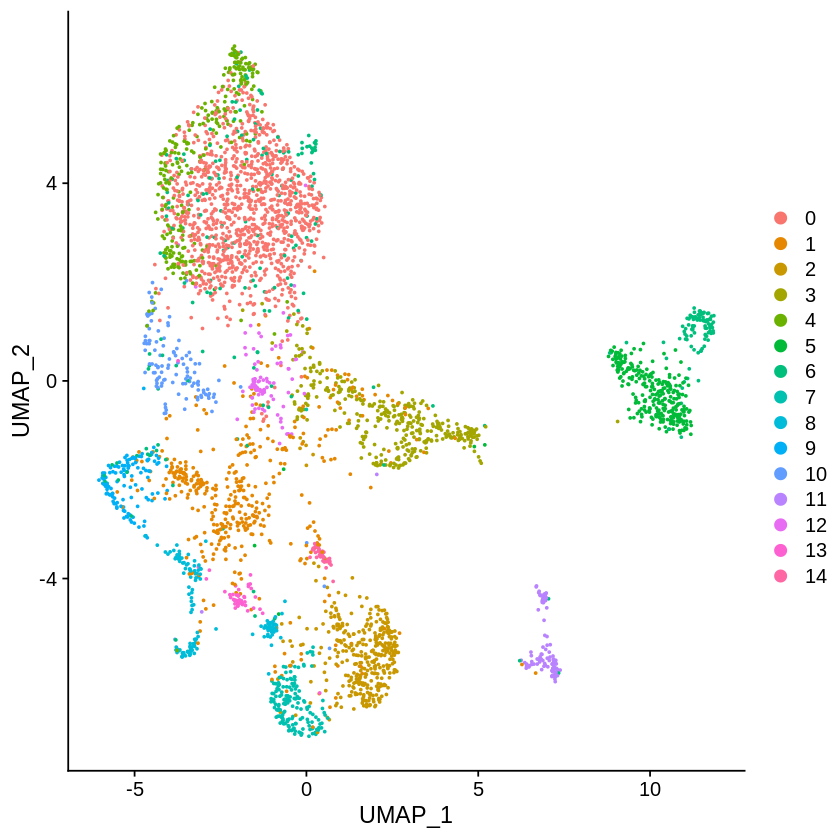

In [13]:
DimPlot(epithelials)

In [15]:
UMAP3 <- function(data.integrated, dims=1:30){
    data.integrated <- RunPCA(data.integrated, verbose = FALSE)
    data.integrated <- RunUMAP(data.integrated, dims = 1:30, n.neighbors = 20, min.dist= 0.1, verbose = FALSE, umap.method = 'umap-learn', metric = 'correlation')
    data.integrated <- FindNeighbors(data.integrated, dims = 1:30, verbose = FALSE)
    data.integrated <- FindClusters(data.integrated, verbose = FALSE)
    return (data.integrated)
}

In [50]:
colors <- readRDS('seurat_object/a/distinct_colors.Rds')

In [58]:
color15 <- readline(as.character(colors[15]))

c("#889DD7", "#DD56CA", "#D4A165", "#8470D8", "#D386C1", "#79DF8D", "#DDE6D5", "#80E64C", "#C7DA98", "#7FBBCC", "#D7DE55", "#E36566", "#79E3D0", "#B039E7", "#D8B7C7") c("#889DD7", "#DD56CA", "#D4A165", "#8470D8", "#D386C1", "#79DF8D", "#DDE6D5", "#80E64C", "#C7DA98", "#7FBBCC", "#D7DE55", "#E36566", "#79E3D0", "#B039E7", "#D8B7C7")


In [16]:
epithelials <- UMAP3(epithelials)

In [41]:
colors[15]

[[1]]
 [1] "#889DD7" "#DD56CA" "#D4A165" "#8470D8" "#D386C1" "#79DF8D" "#DDE6D5"
 [8] "#80E64C" "#C7DA98" "#7FBBCC" "#D7DE55" "#E36566" "#79E3D0" "#B039E7"
[15] "#D8B7C7"

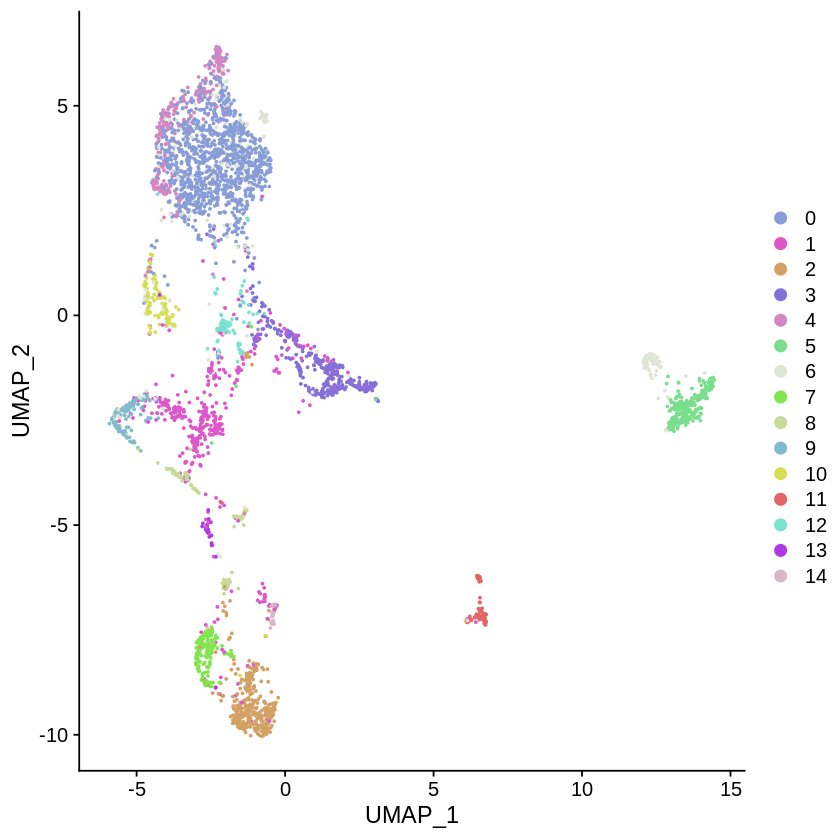

In [66]:
DimPlot(epithelials, cols = color)

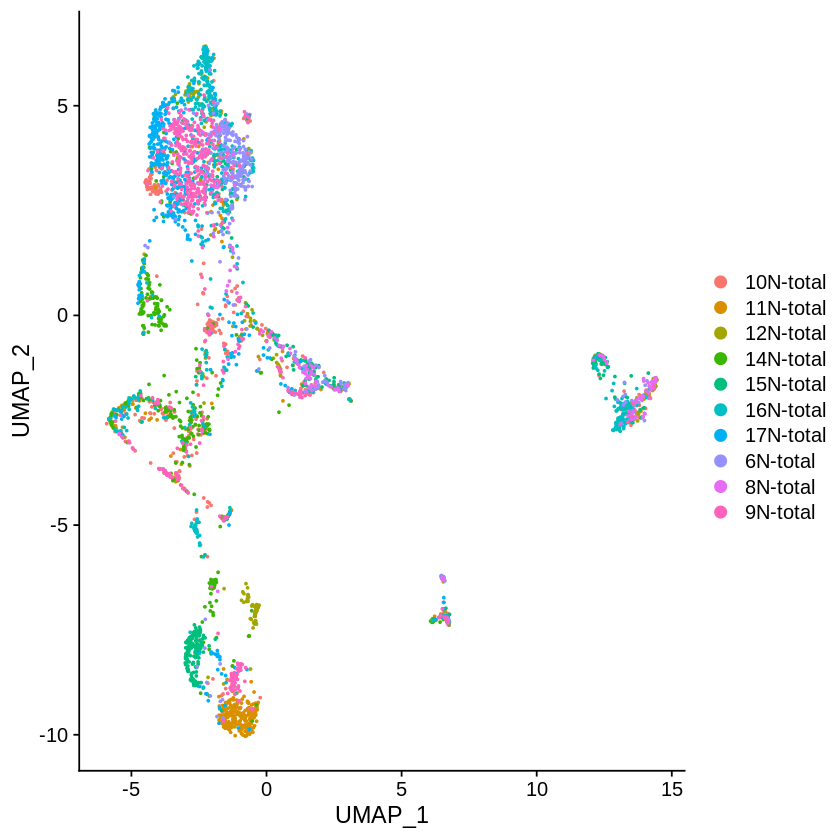

In [67]:
DimPlot(epithelials, group.by='orig.ident')

In [48]:
epithelial.marker <- FindAllMarkers(epithelials, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)

Calculating cluster 0
Calculating cluster 1
Calculating cluster 2
Calculating cluster 3
Calculating cluster 4
Calculating cluster 5
Calculating cluster 6
Calculating cluster 7
Calculating cluster 8
Calculating cluster 9
Calculating cluster 10
Calculating cluster 11
Calculating cluster 12
Calculating cluster 13
Calculating cluster 14


In [63]:
remove_samples <- function(data, sample_name){
    Idents(data) <- 'orig.ident'
    data <- subset(data, idents=sample_name,invert=TRUE)
    Idents(data) <- 'seurat_clusters'
    return (data)
}

In [64]:
all <- remove_samples(all,'18N-total')
epithelials <- remove_samples(epithelials,'18N-total')

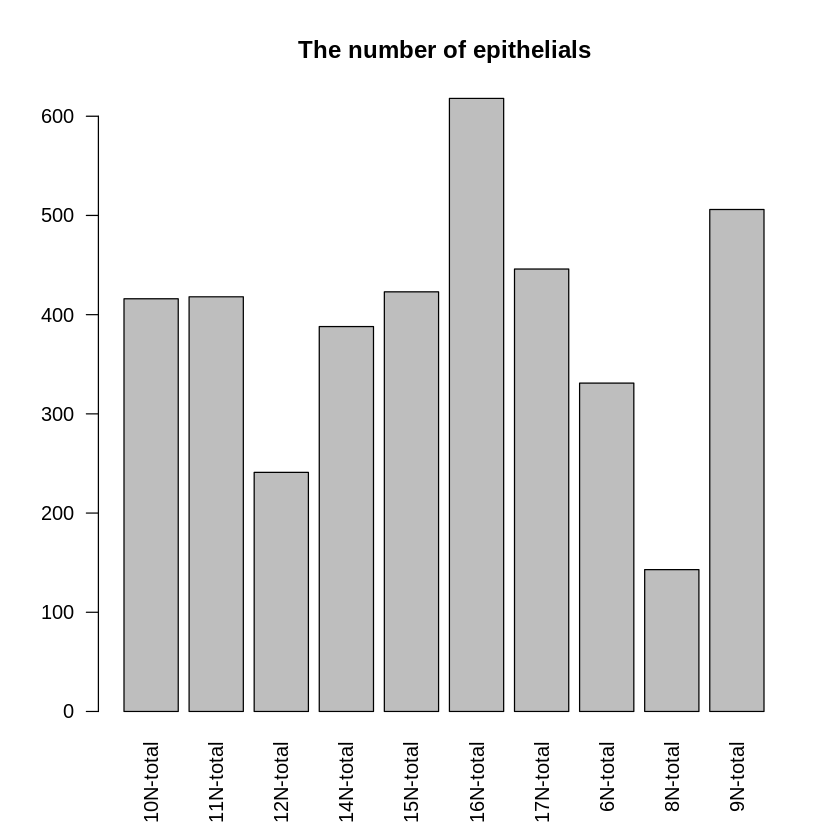

In [65]:
barplot(table(epithelials[[]]$orig.ident),las=2,xlab = ' ',main = 'The number of epithelials')

# write.csv(epithelial.marker,file='seurat_object/epi_markers.csv')

In [69]:
for(i in 0:14){
    print(epithelial.marker %>% filter(cluster==i) %>%filter(p_val_adj<0.05))
    print(' ')
    print(' ')
    print(' ')
}

           p_val avg_logFC pct.1 pct.2     p_val_adj cluster      gene
1   0.000000e+00 1.9076560 0.959 0.226  0.000000e+00       0      GKN1
2   0.000000e+00 1.7714769 0.913 0.222  0.000000e+00       0    MUC5AC
3   0.000000e+00 1.6133312 0.888 0.291  0.000000e+00       0      MUC1
4   0.000000e+00 1.5912547 0.889 0.179  0.000000e+00       0      GKN2
5   0.000000e+00 1.5893653 0.903 0.256  0.000000e+00       0      TFF2
6   0.000000e+00 1.4289997 0.992 0.344  0.000000e+00       0      TFF1
7  1.120260e-242 1.2670956 0.843 0.288 3.757128e-238       0      PSCA
8  5.757514e-229 1.5256725 0.748 0.271 1.930955e-224       0       CA2
9  4.037072e-190 1.5843759 0.568 0.126 1.353953e-185       0     MUCL3
10 1.171593e-184 1.0872363 0.829 0.366 3.929288e-180       0     S100P
11 1.459796e-178 1.9523735 0.407 0.053 4.895864e-174       0    SLC5A5
12 4.418692e-133 1.2779650 0.573 0.206 1.481941e-128       0    RNASE1
13 2.593609e-131 1.1764518 0.602 0.239 8.698446e-127       0      CTSE
14 8.9

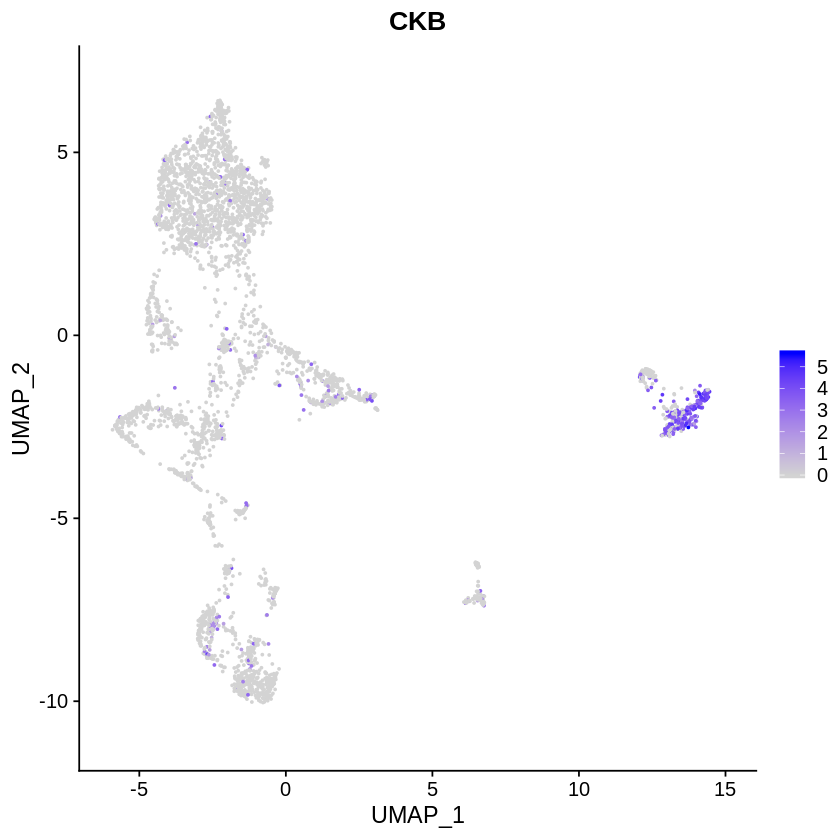

In [70]:
FeaturePlot(epithelials,features='CKB')

In [74]:
epis <- c('Foveolar',#0
 'cluster 1',#1
 'Inflamed mucosa?',#2
 'Chief',#3
 'oxidative-stressed?\nfoveolar',#4
 'Parietal',#5
 'soup-mixed',#6
 'cluster7',#7
 'Goblet cells',#8
 'Intestine \nmetaplasia',#9
 'cluster 10',#10
 'Neuroendocrine',#11
 'cluster 12',#12
 'cluster 13',#13
 'FGFR+ epi') #14

In [75]:
epithelials2 <- epithelials

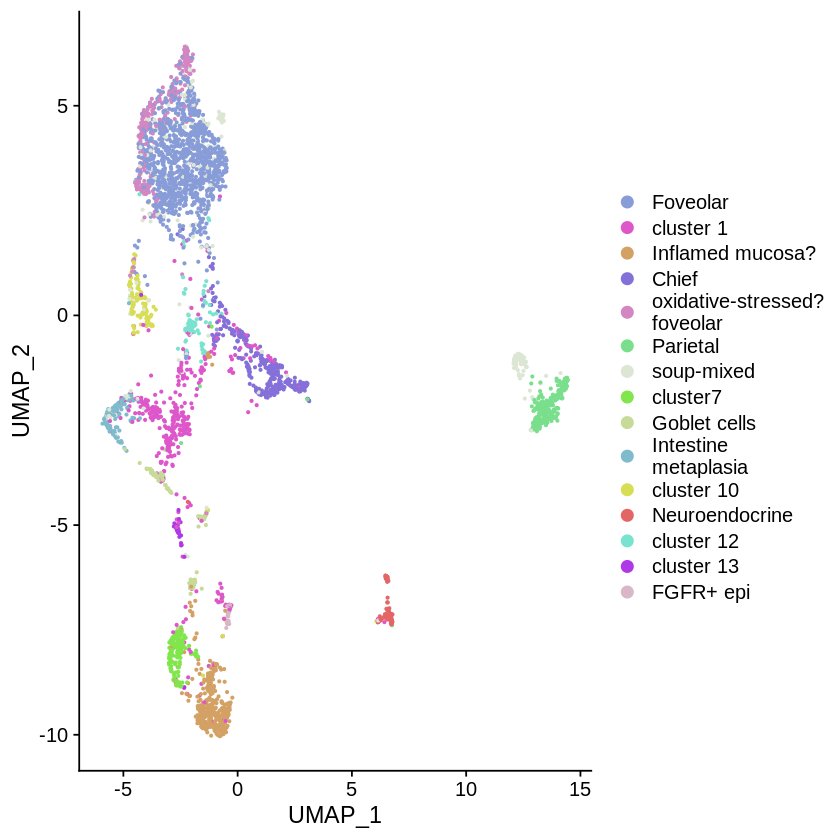

In [78]:
new.cluster.ids <- epis
names(new.cluster.ids) <- levels(epithelials2)
epithelials2 <- RenameIdents(epithelials2, new.cluster.ids)
DimPlot(epithelials2, reduction = "umap", pt.size = 0.5, cols=color)

In [79]:
cluster_count <- cluster_count_function(epithelials2, epis)

In [80]:
cluster_count

,10N-total,11N-total,12N-total,14N-total,15N-total,16N-total,17N-total,6N-total,8N-total,9N-total
Foveolar,36,57,27,22,44,205,212,223,11,294
cluster 1,111,19,42,138,7,55,12,6,8,31
Inflamed mucosa?,10,241,6,13,12,0,19,6,0,50
Chief,36,25,32,2,94,17,19,42,51,31
oxidative-stressed? foveolar,59,1,33,13,0,86,86,0,0,11
Parietal,35,2,48,1,25,101,0,21,49,8
soup-mixed,23,6,9,8,69,70,51,15,10,17
cluster7,0,0,0,0,147,0,10,3,0,0
Goblet cells,16,18,1,60,2,1,3,0,0,39
Intestine metaplasia,24,34,1,26,0,24,4,0,2,7


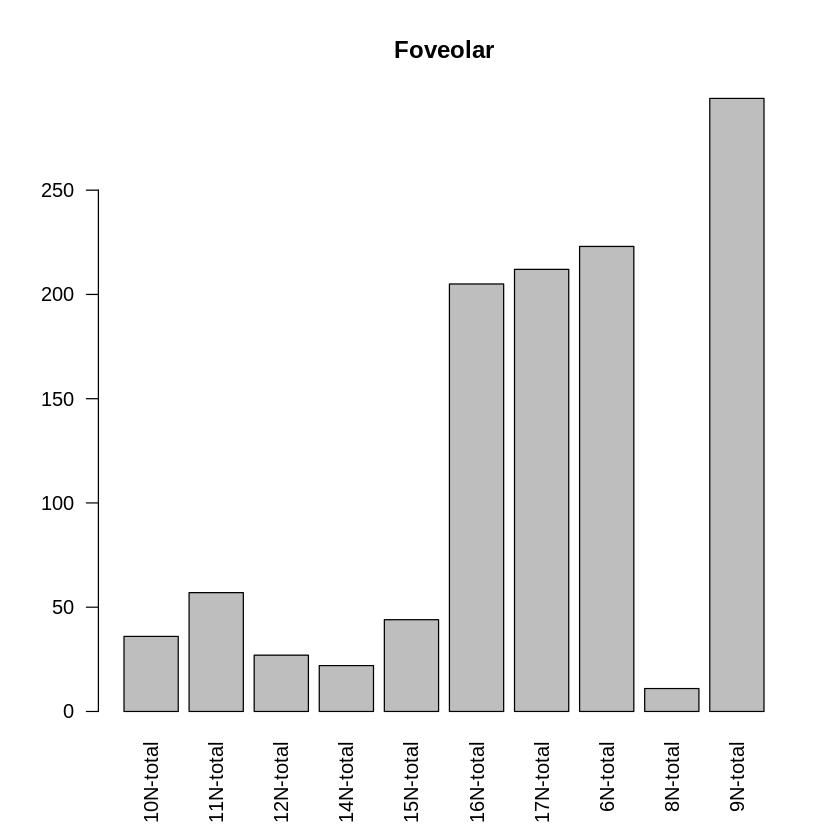

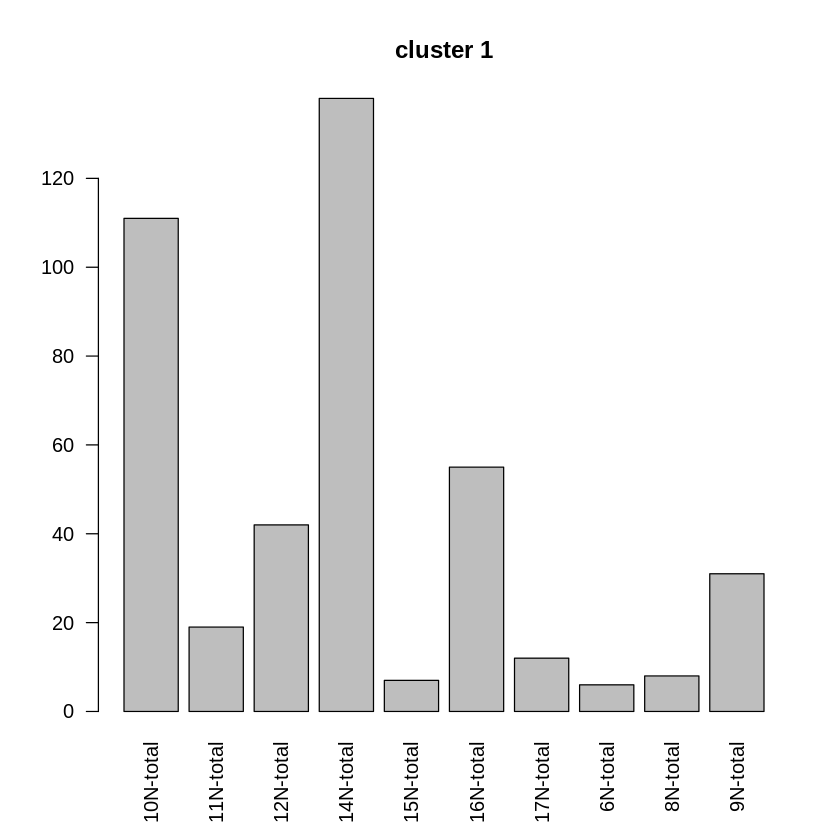

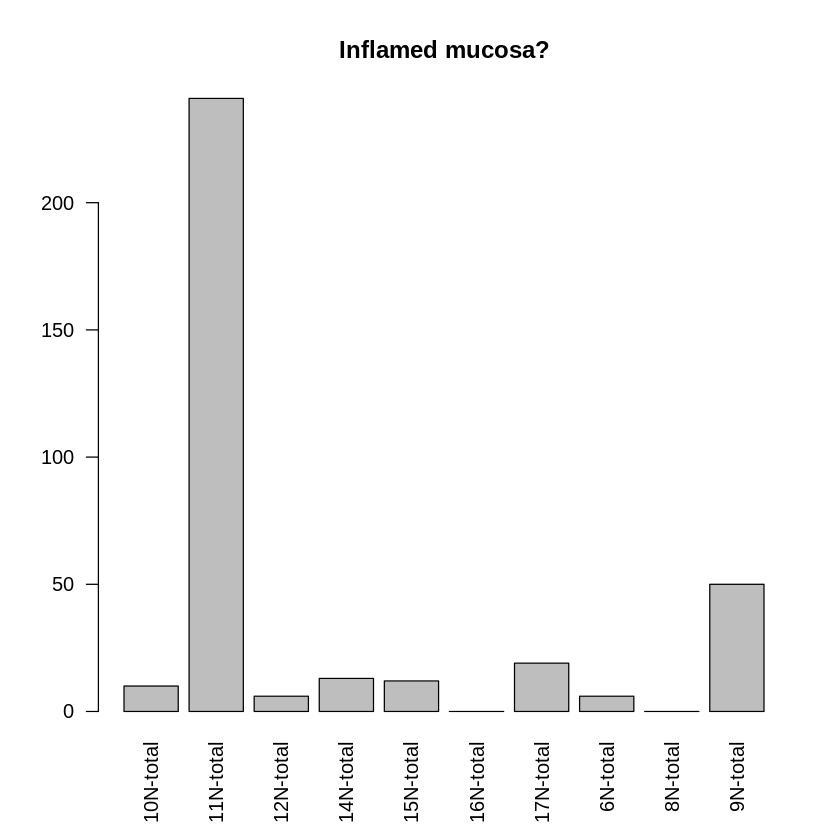

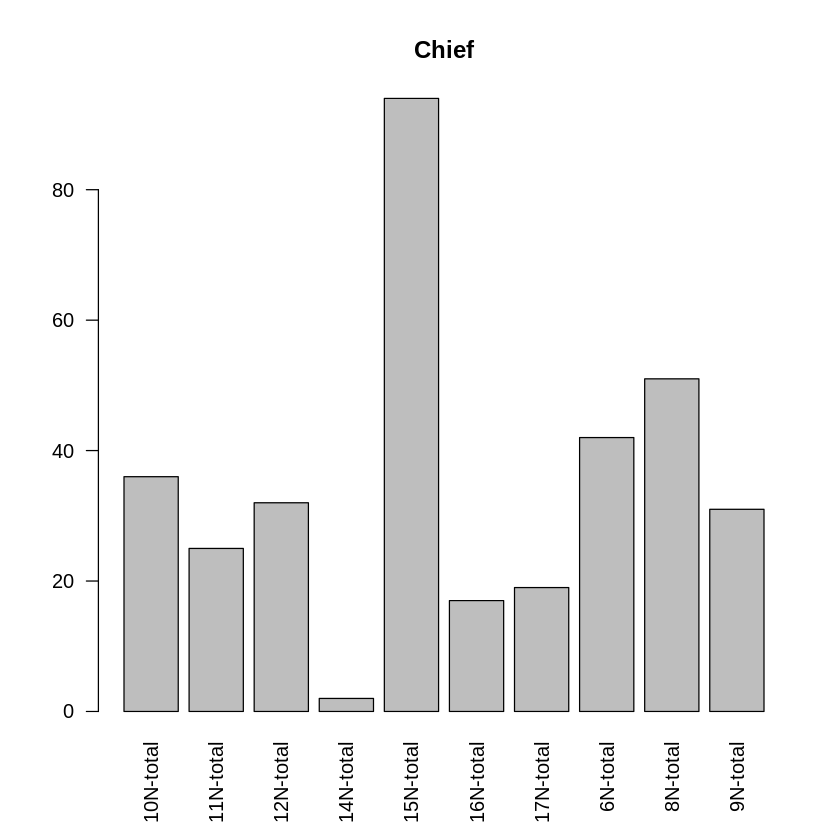

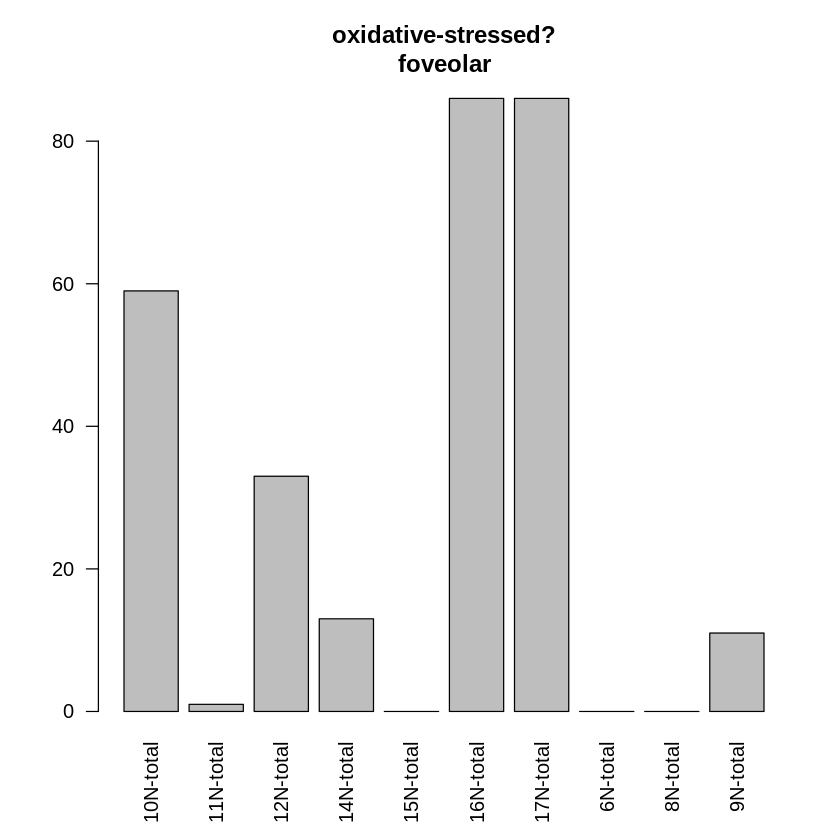

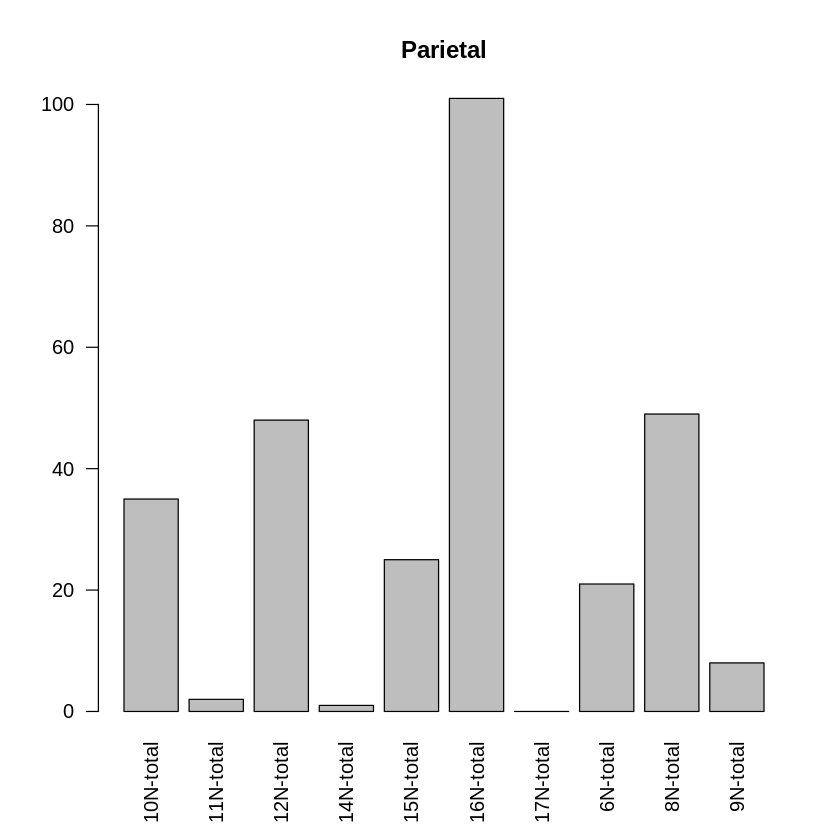

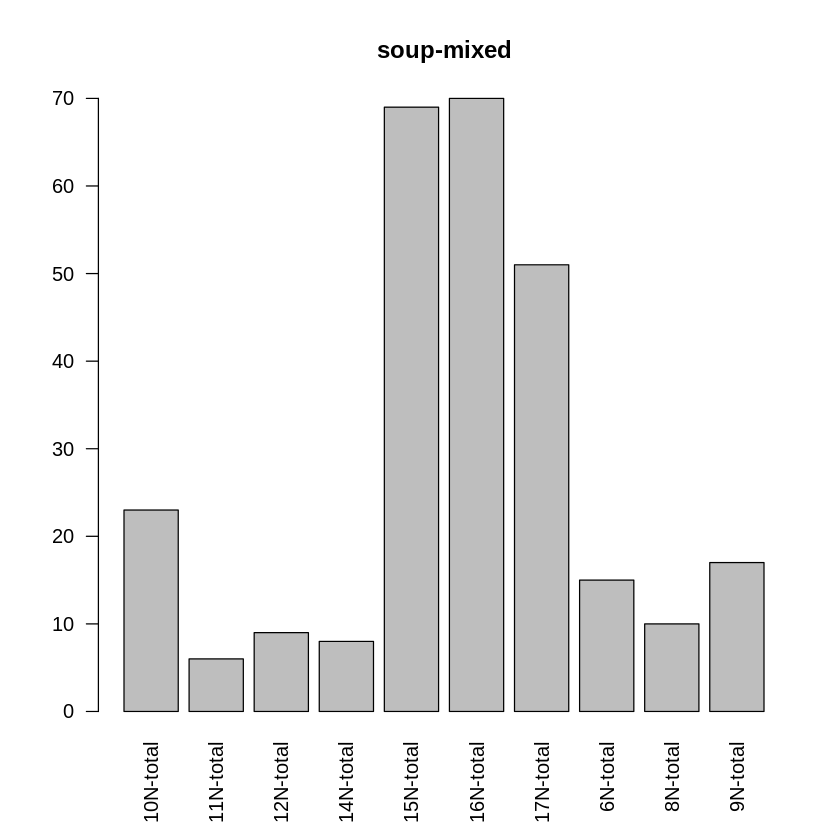

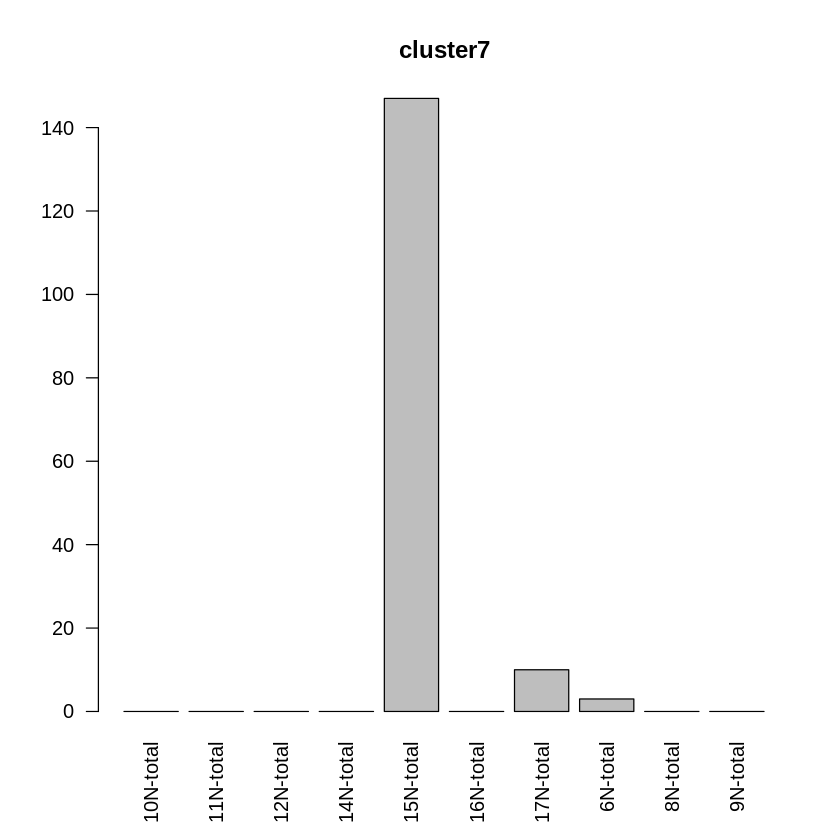

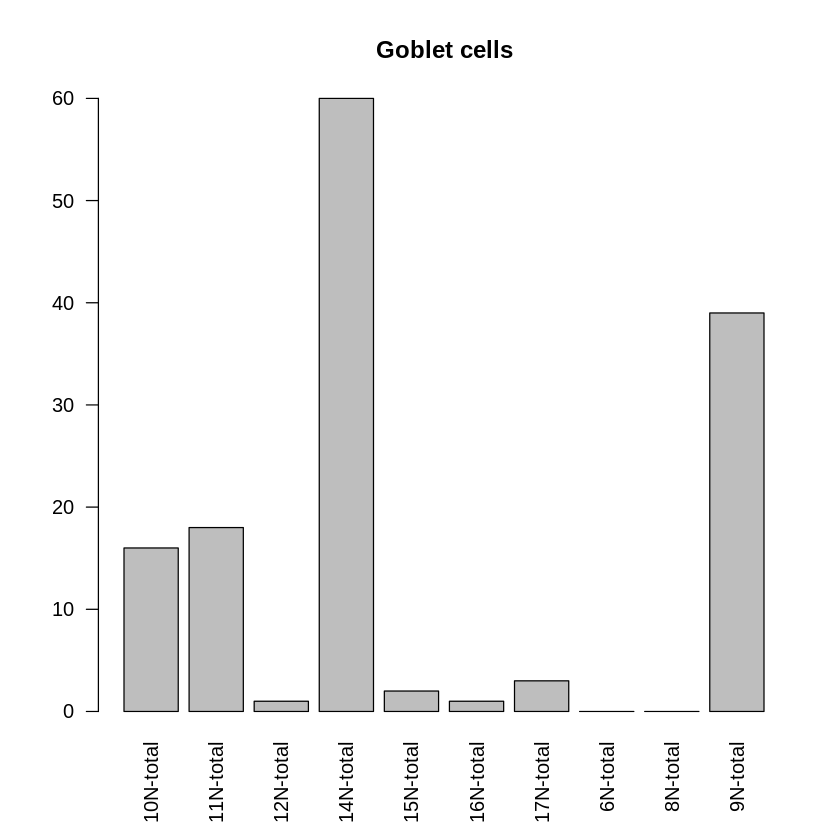

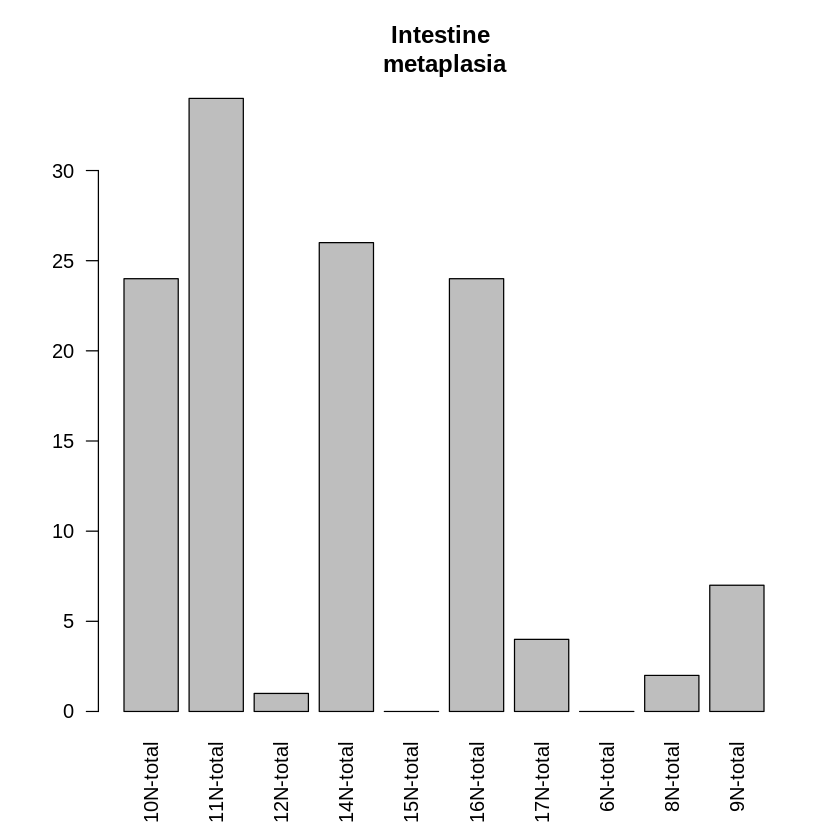

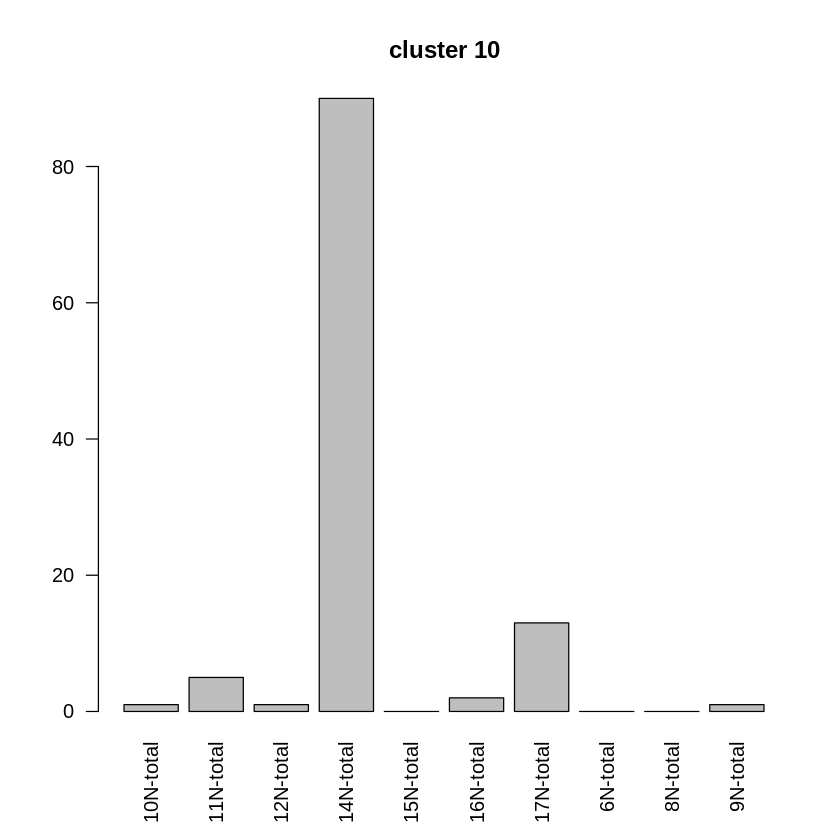

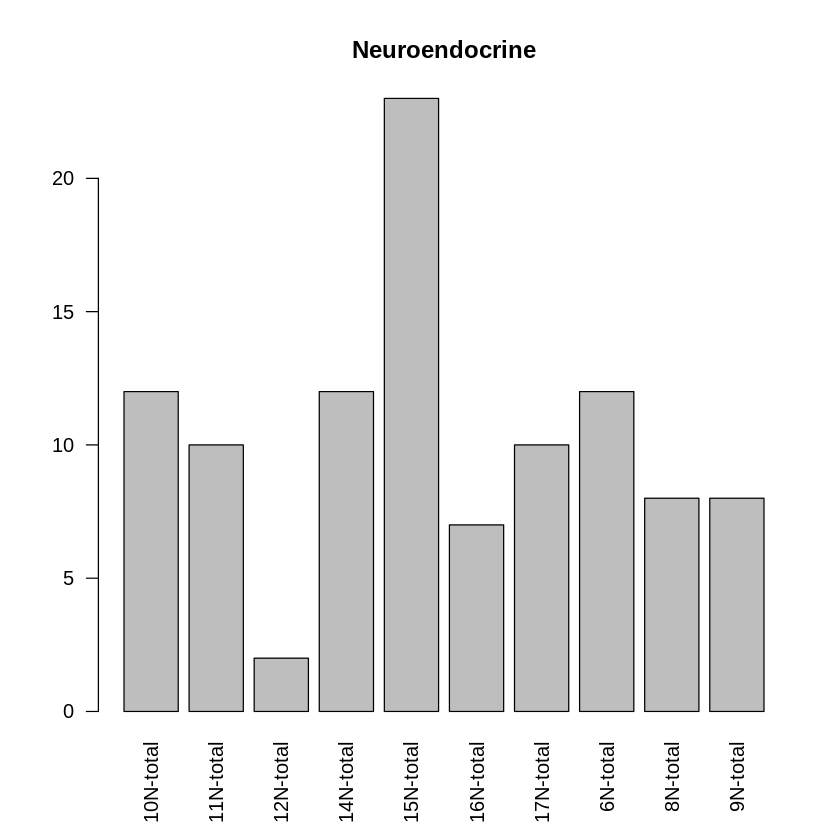

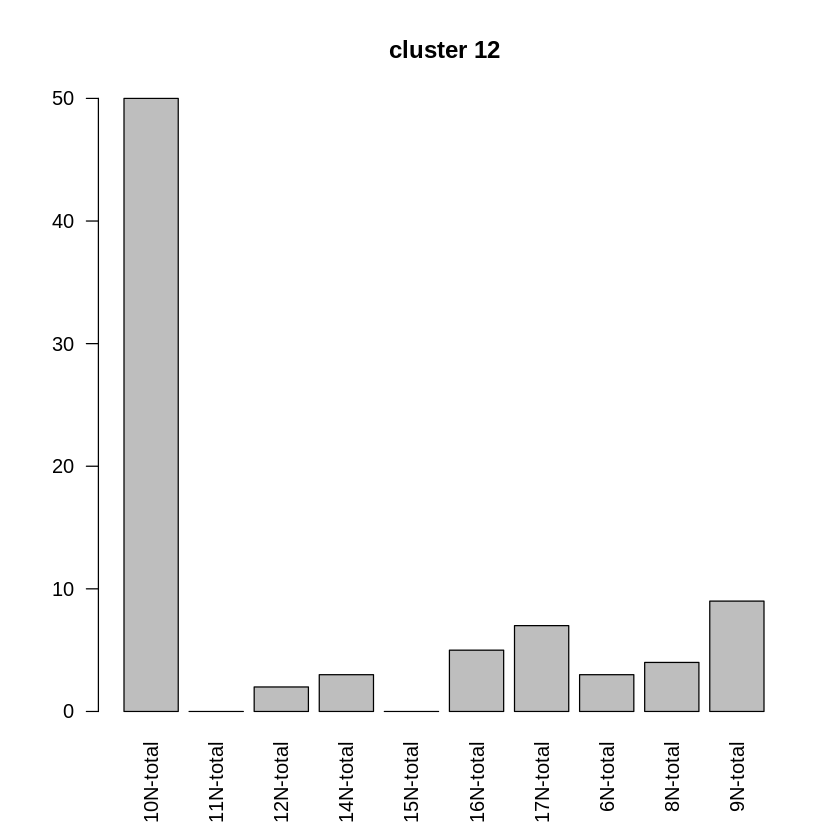

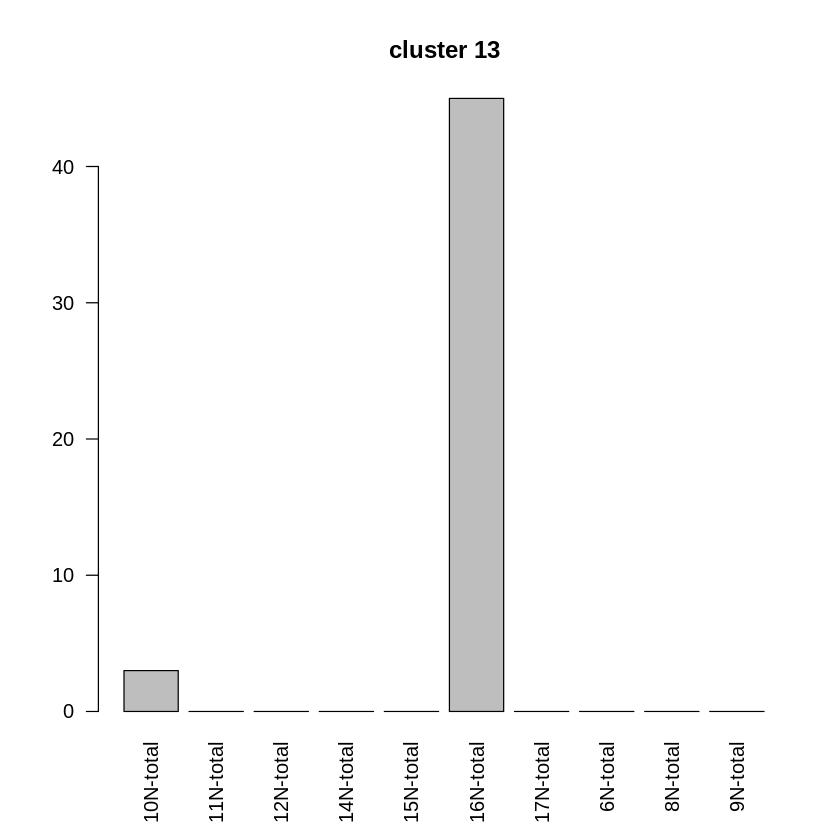

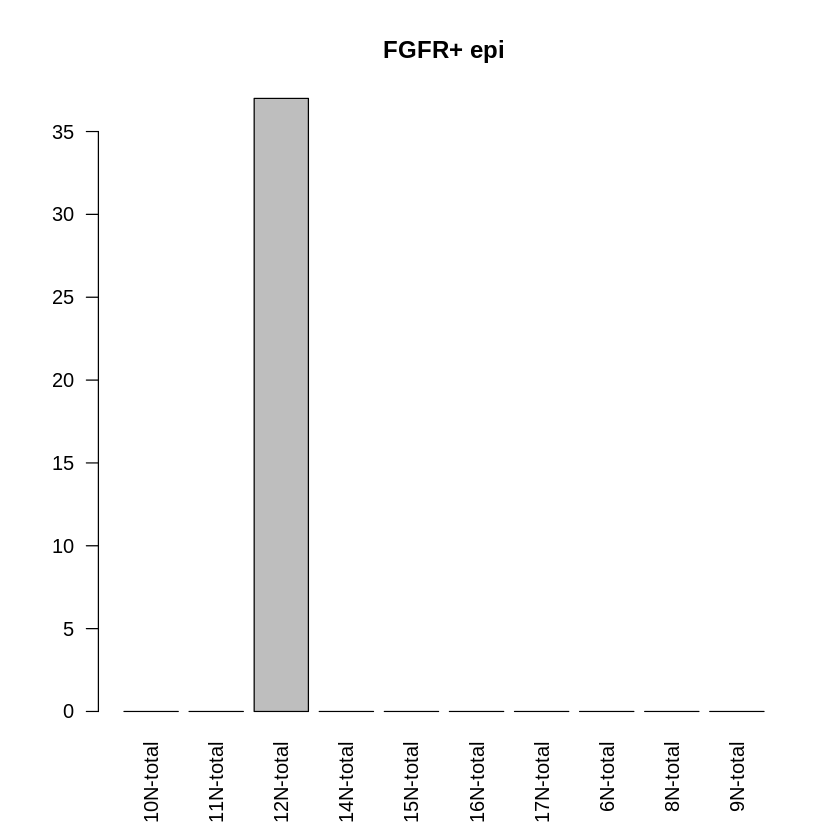

In [82]:
for (i in 1:dim(cluster_count)[1]){
    barplot(cluster_count[i,],las=2, main=rownames(cluster_count)[i])
}

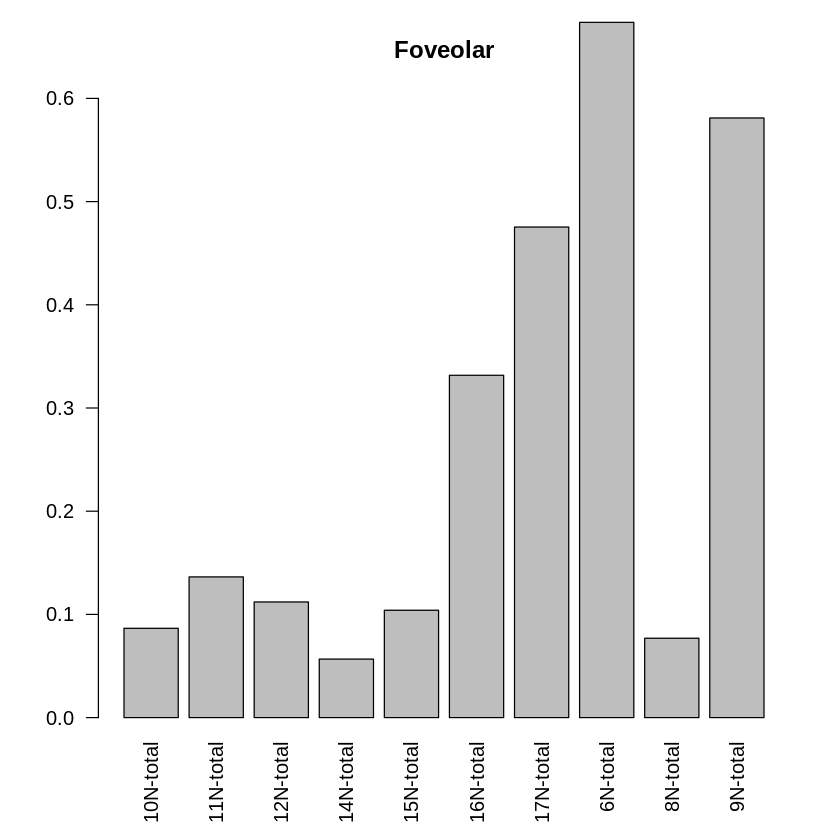

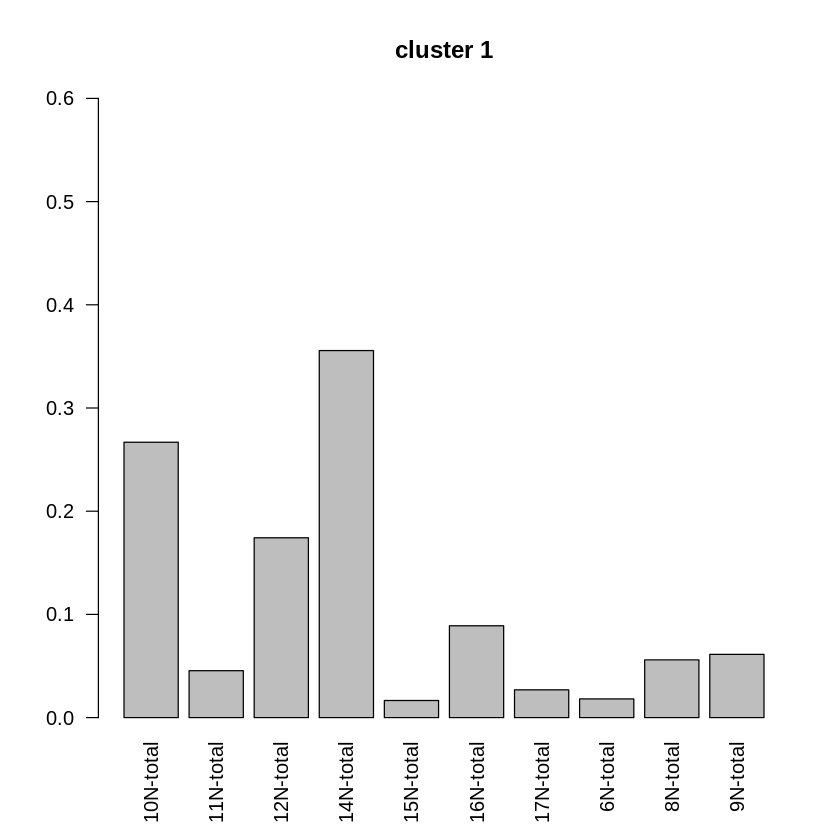

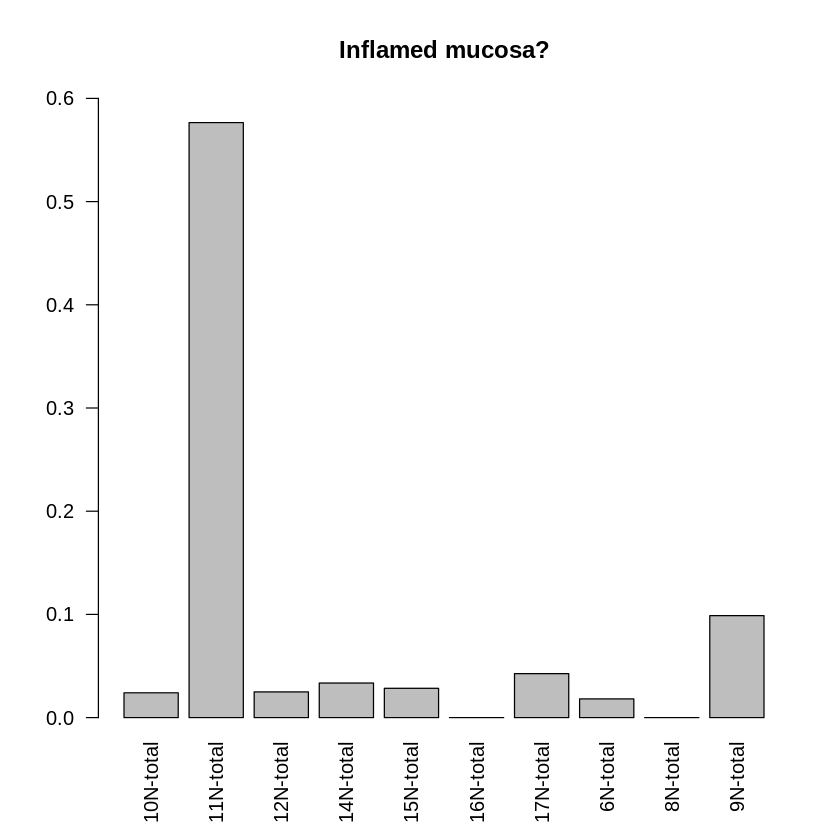

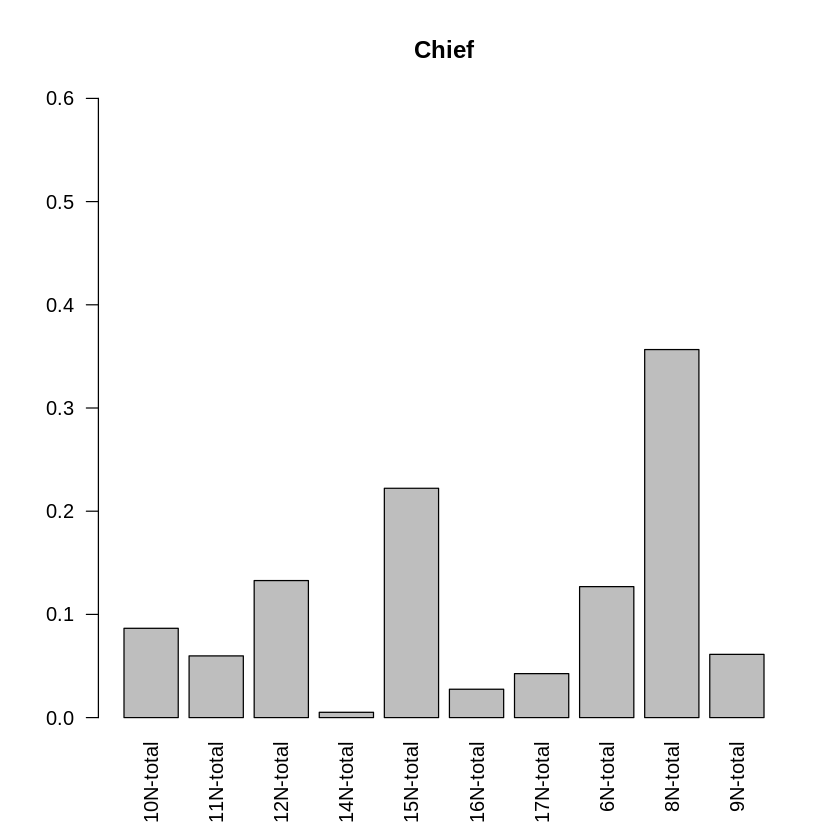

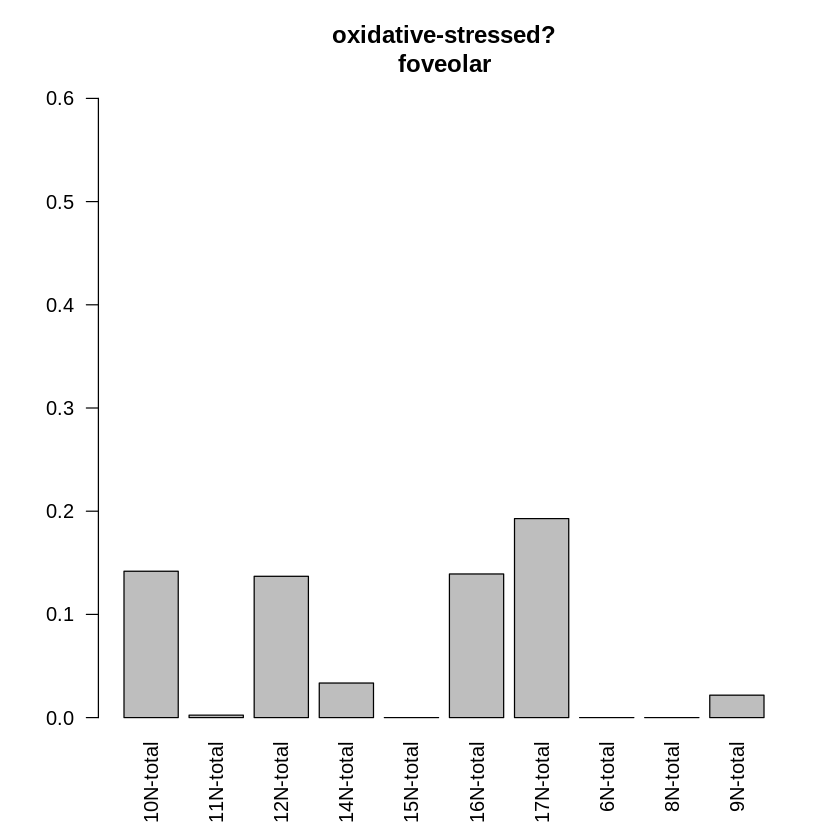

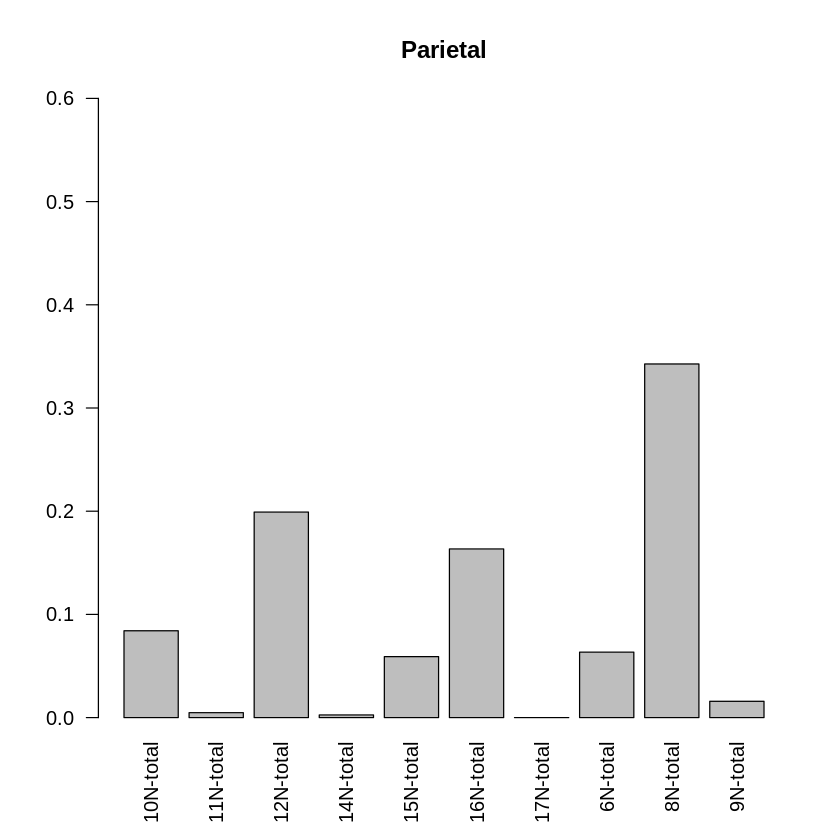

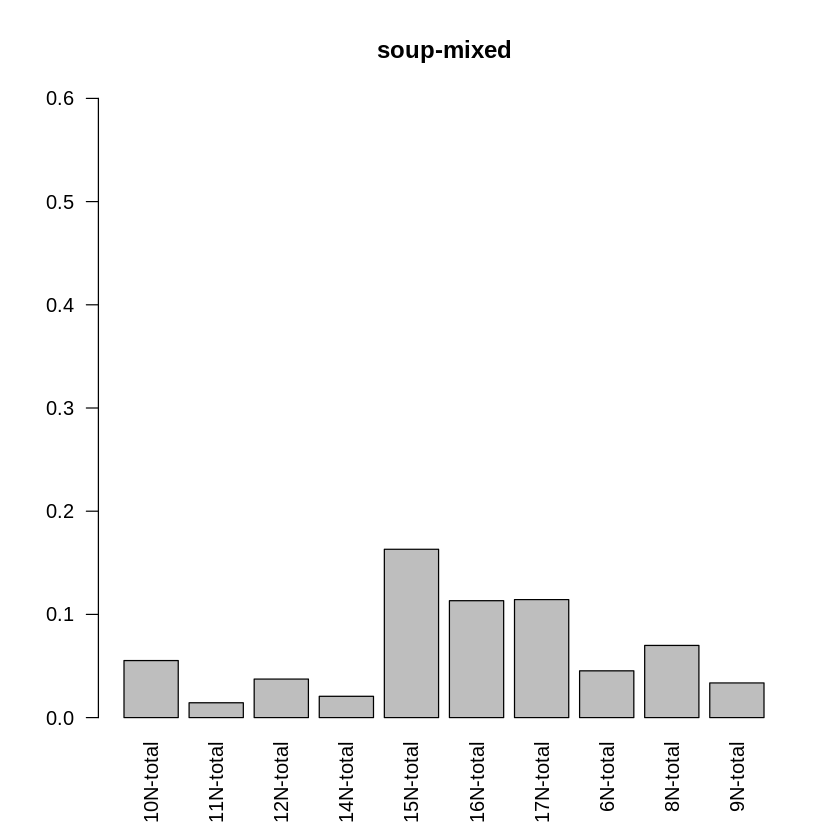

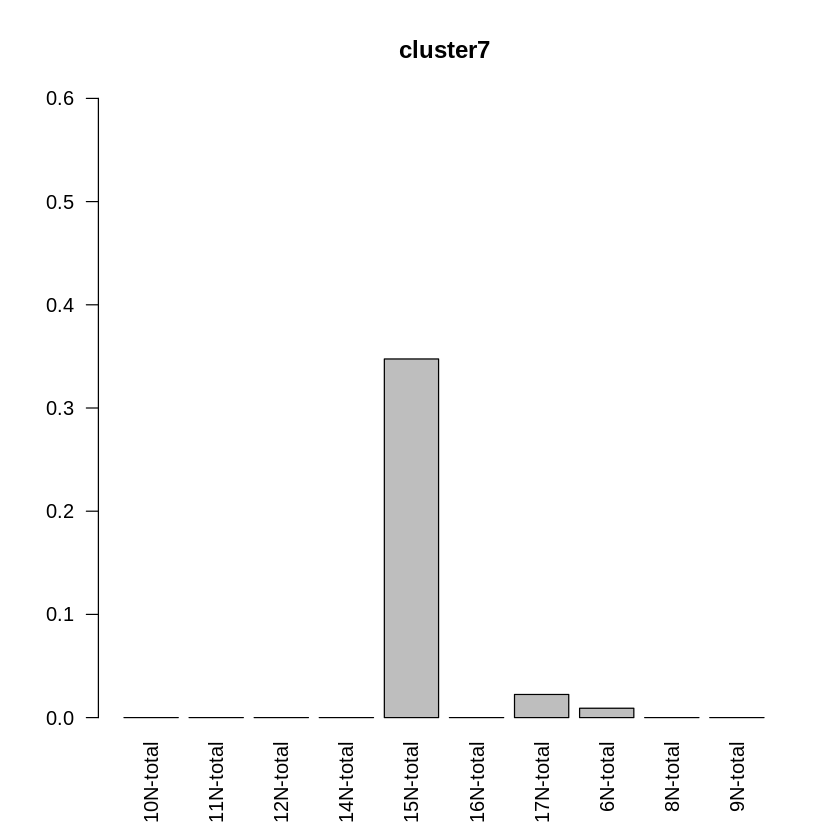

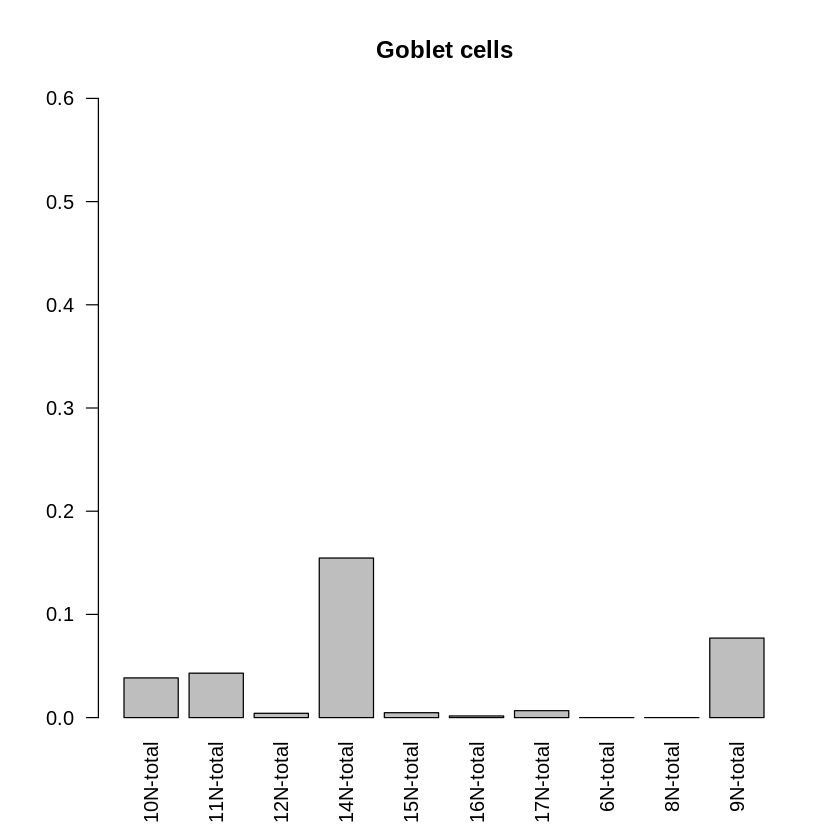

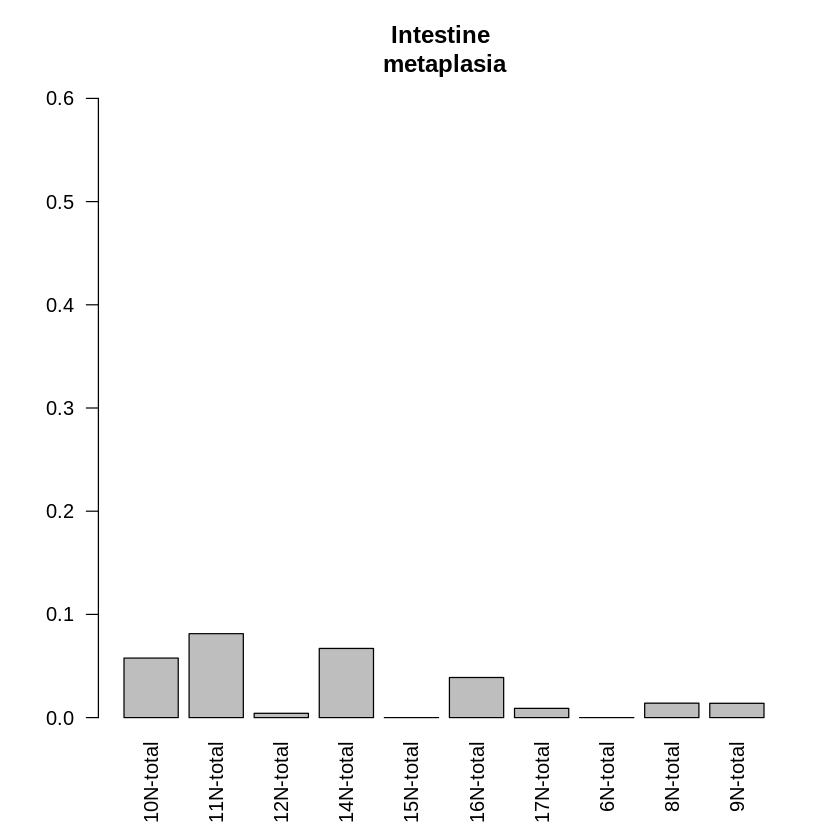

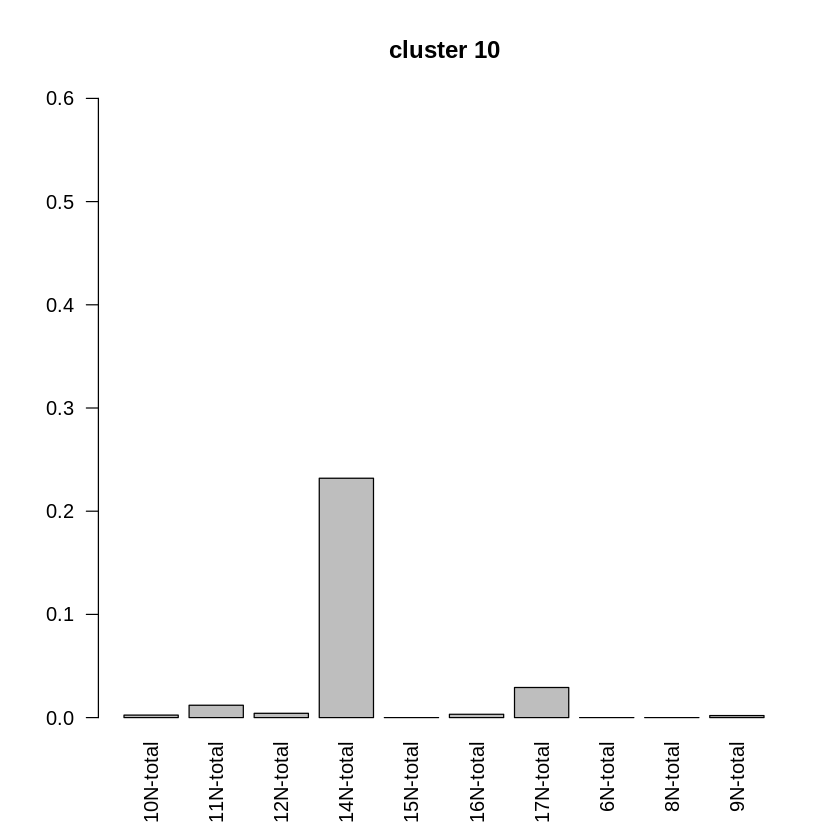

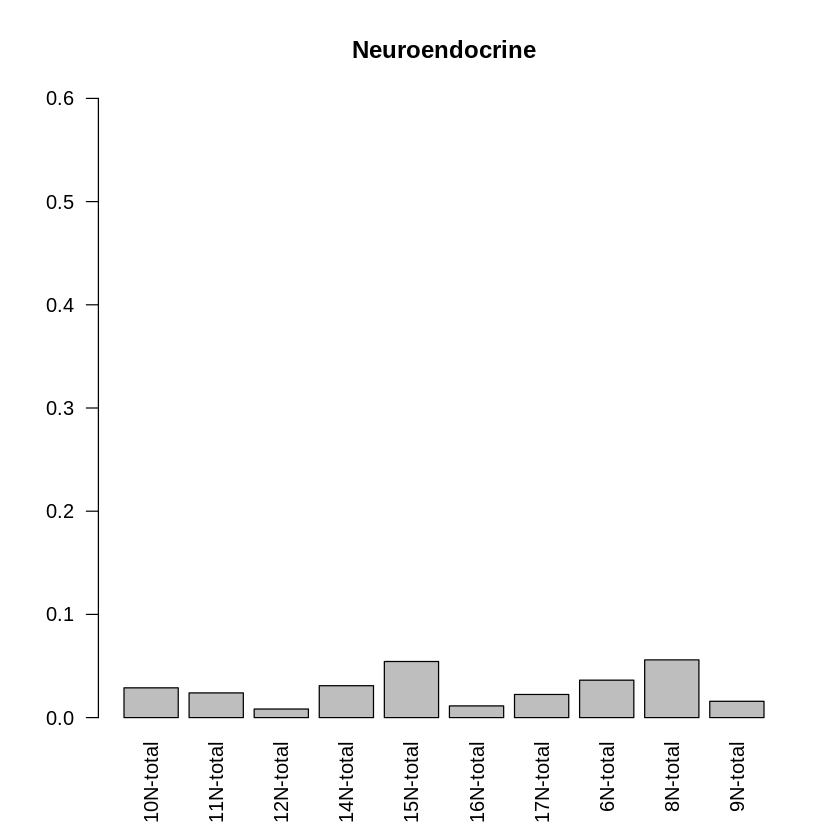

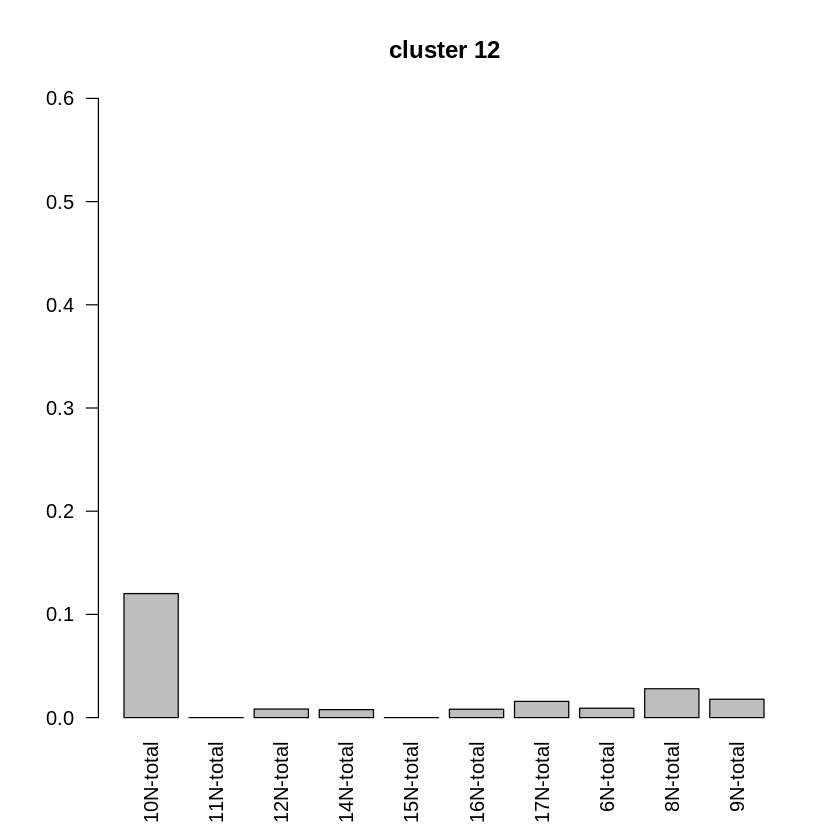

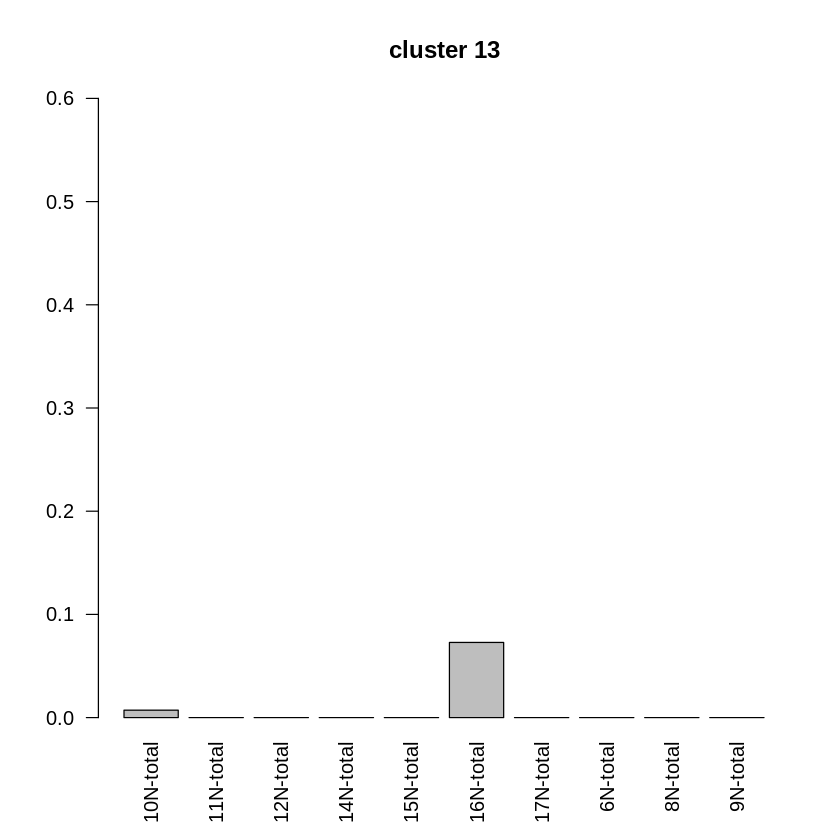

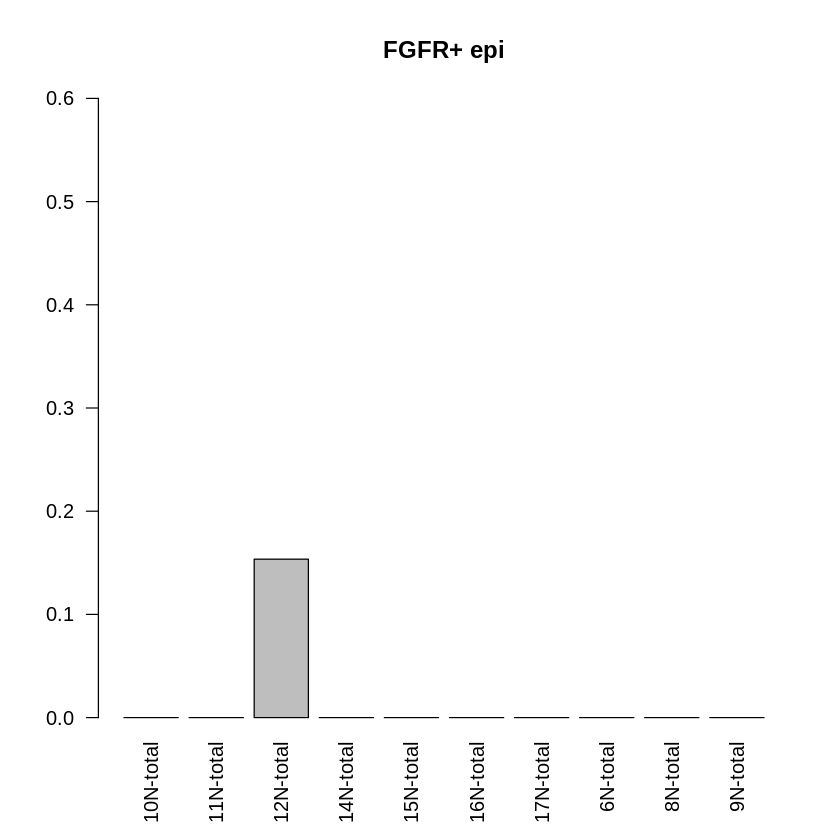

In [83]:
for (i in 1:dim(cluster_count)[1]){
    barplot(cluster_count[i,]/table(epithelials2[[]]$orig.ident),las=2, main=rownames(cluster_count)[i],ylim=c(0,0.6))
}

# 標準化後

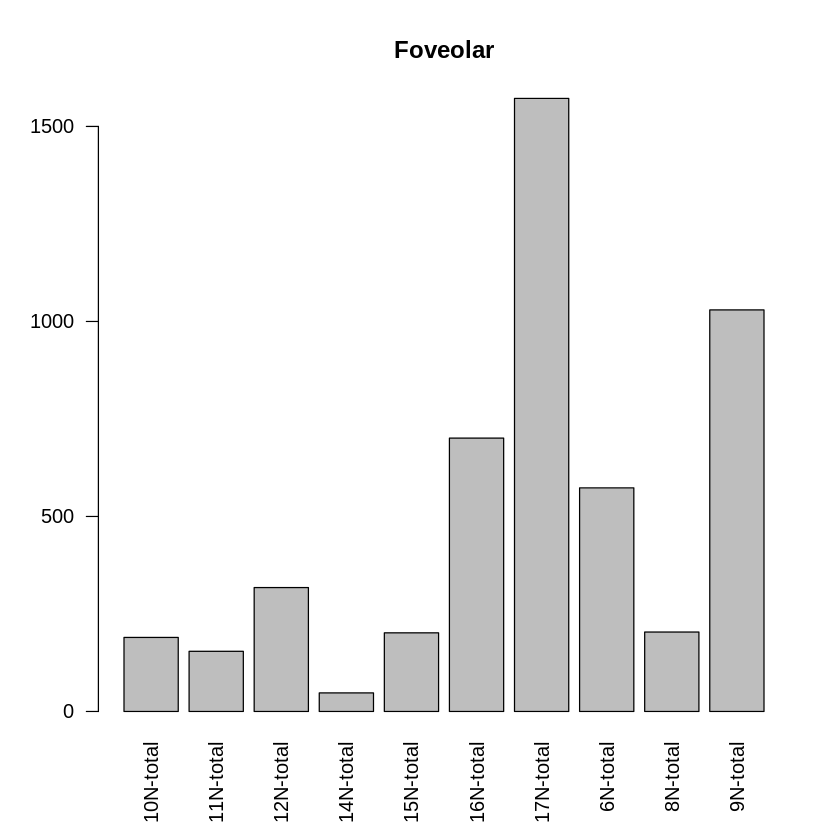

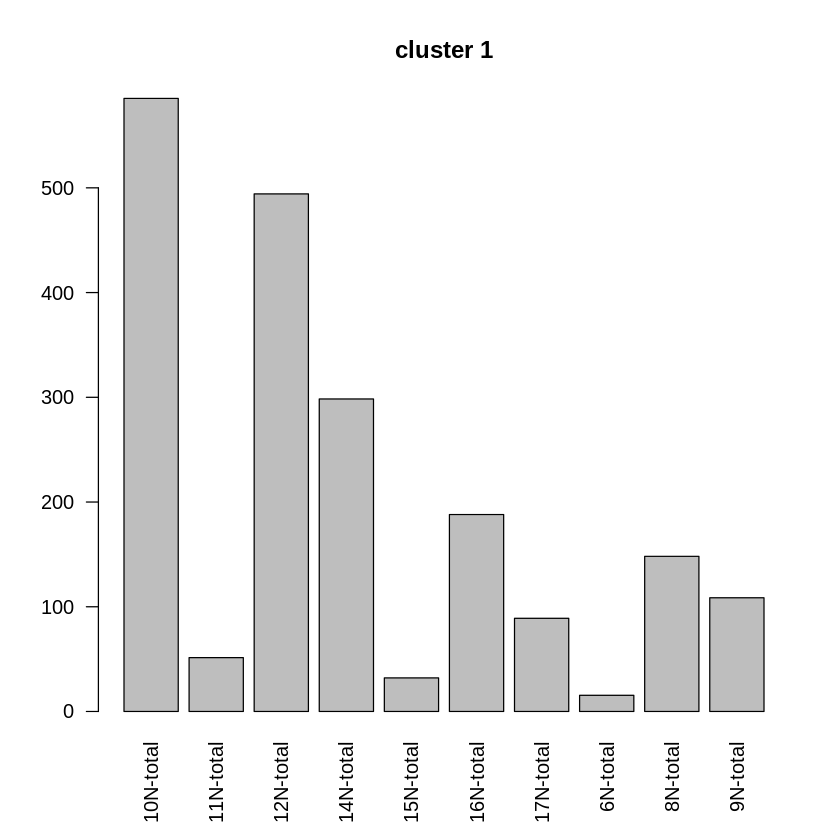

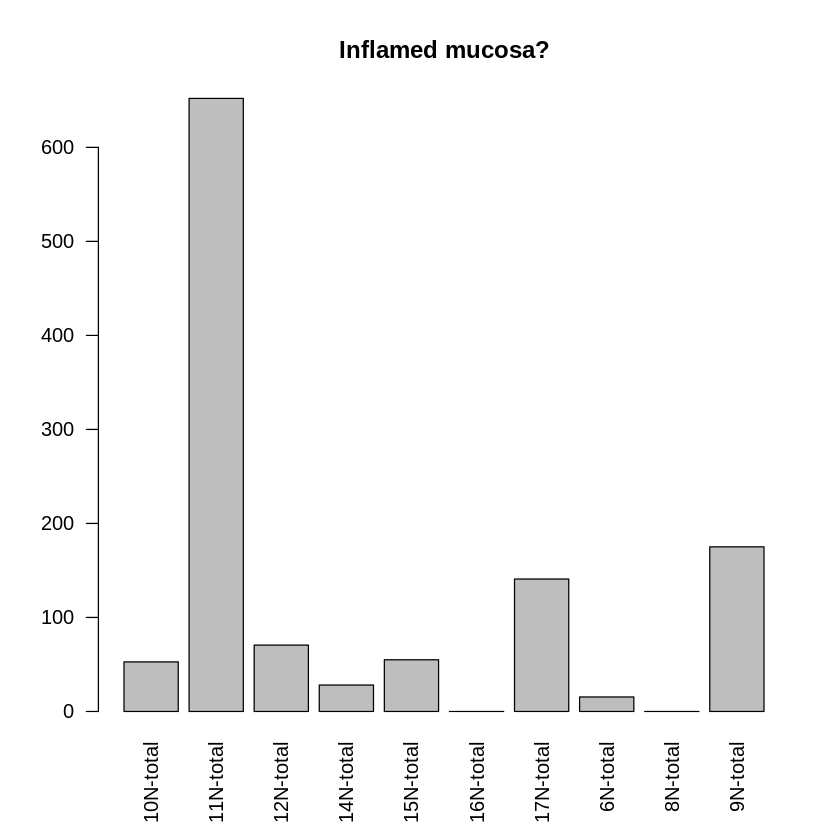

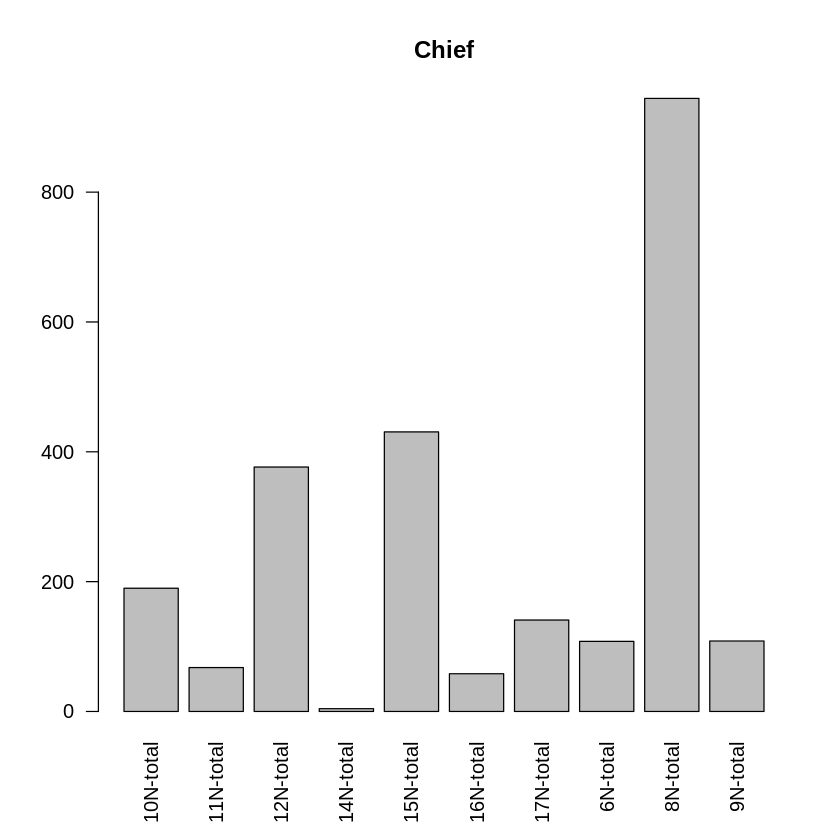

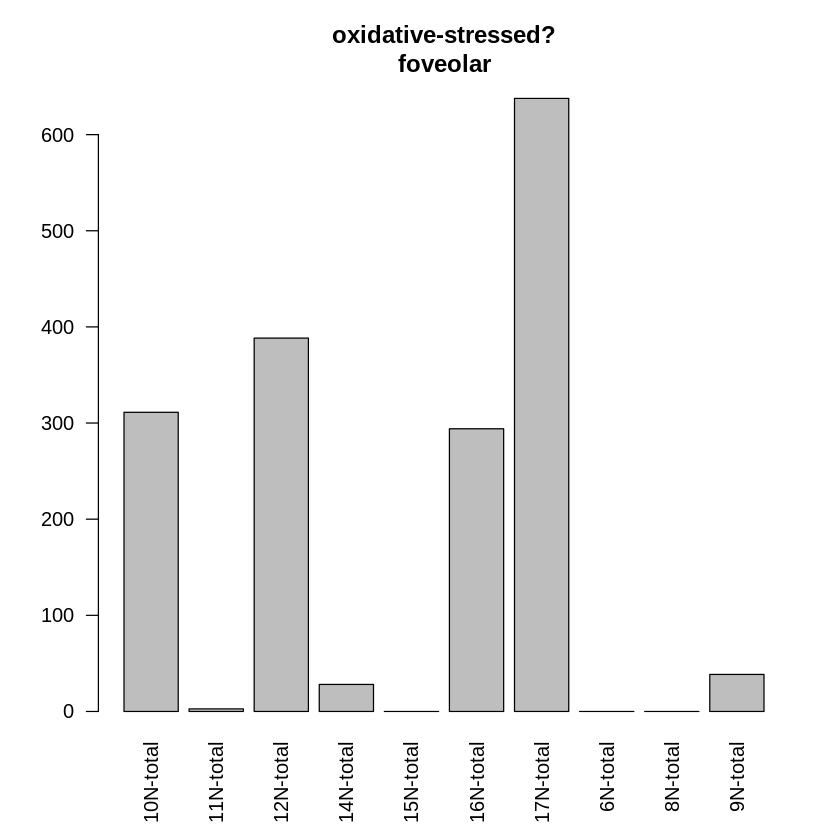

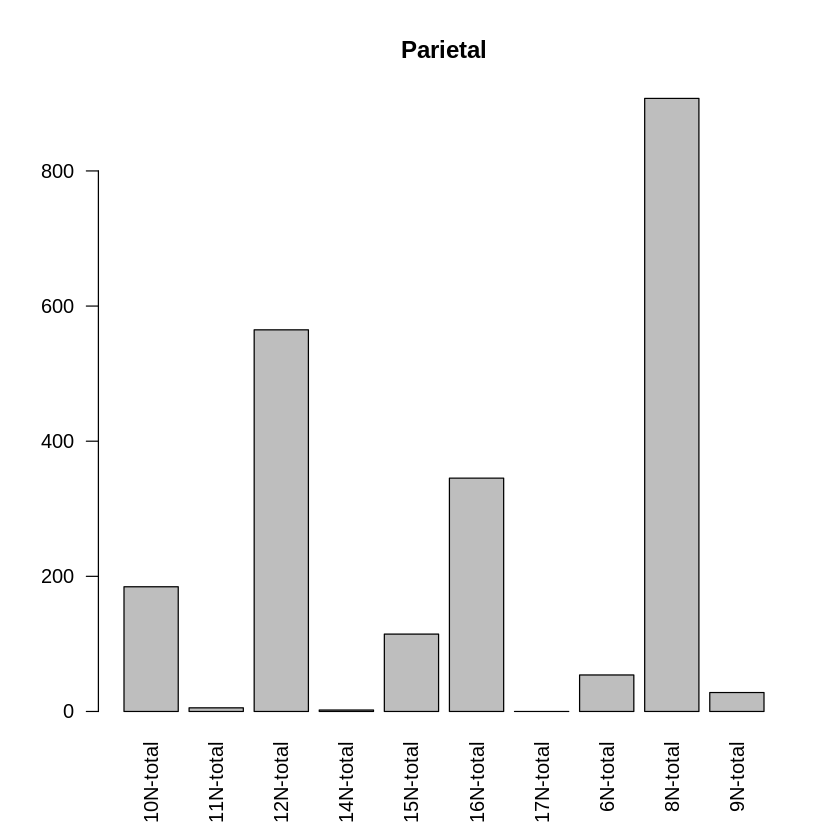

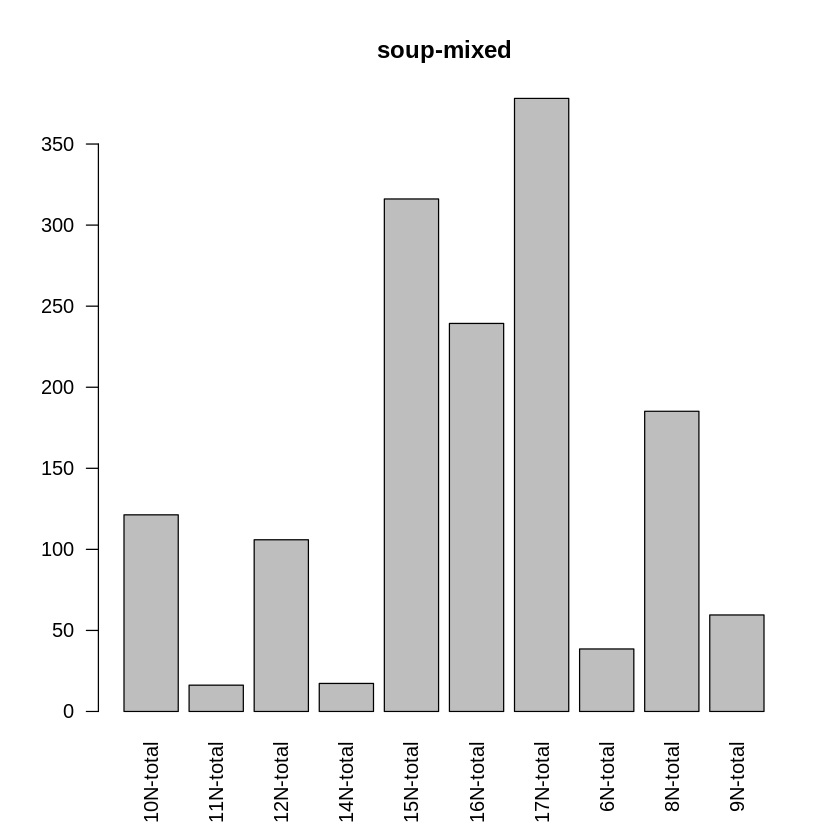

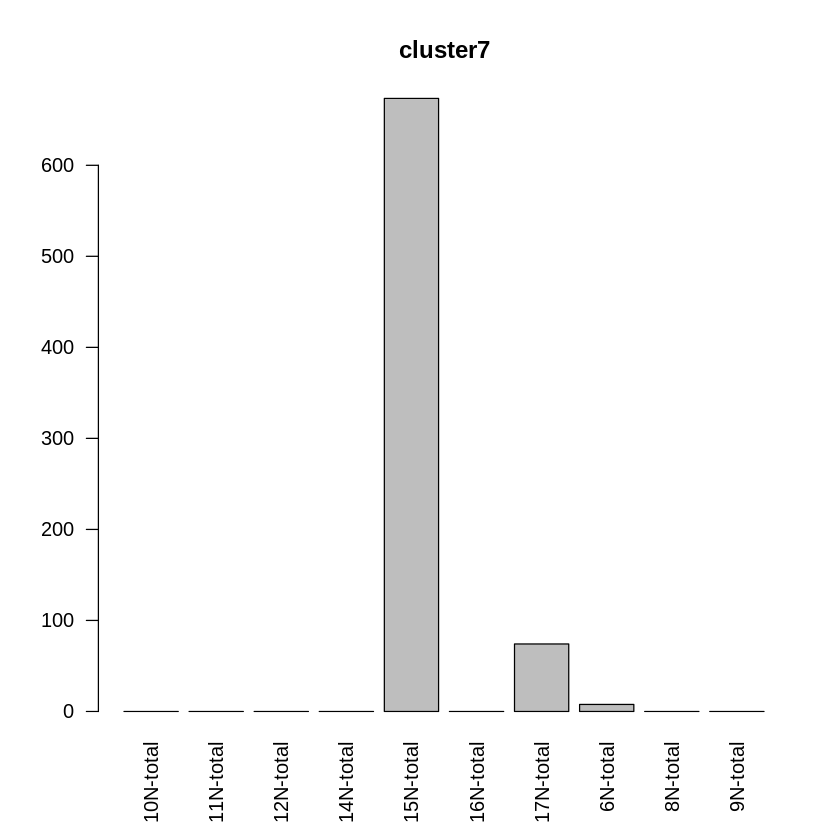

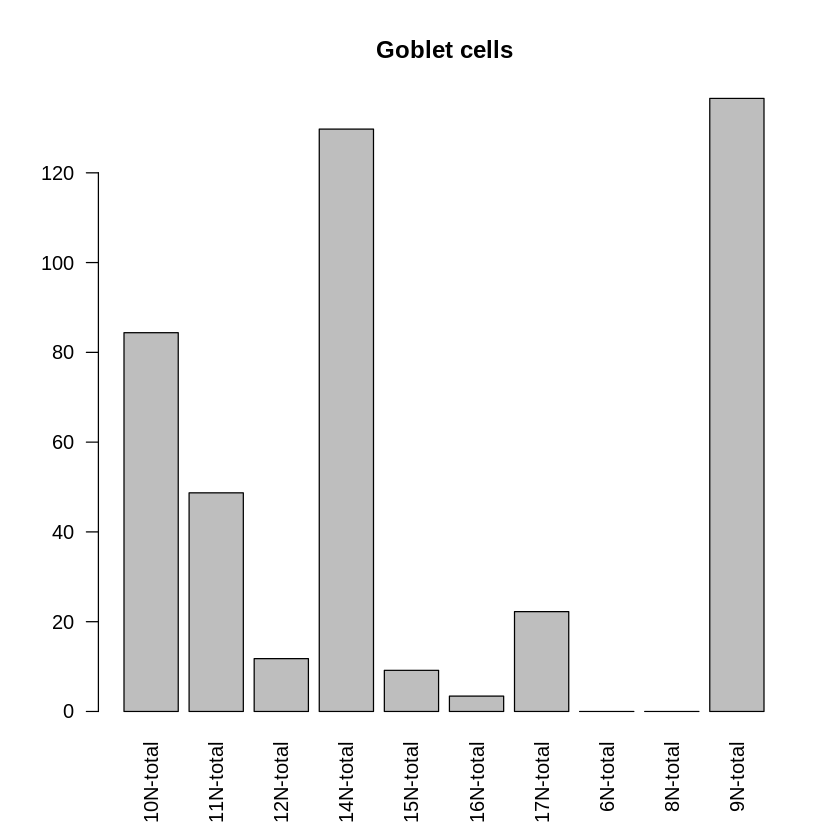

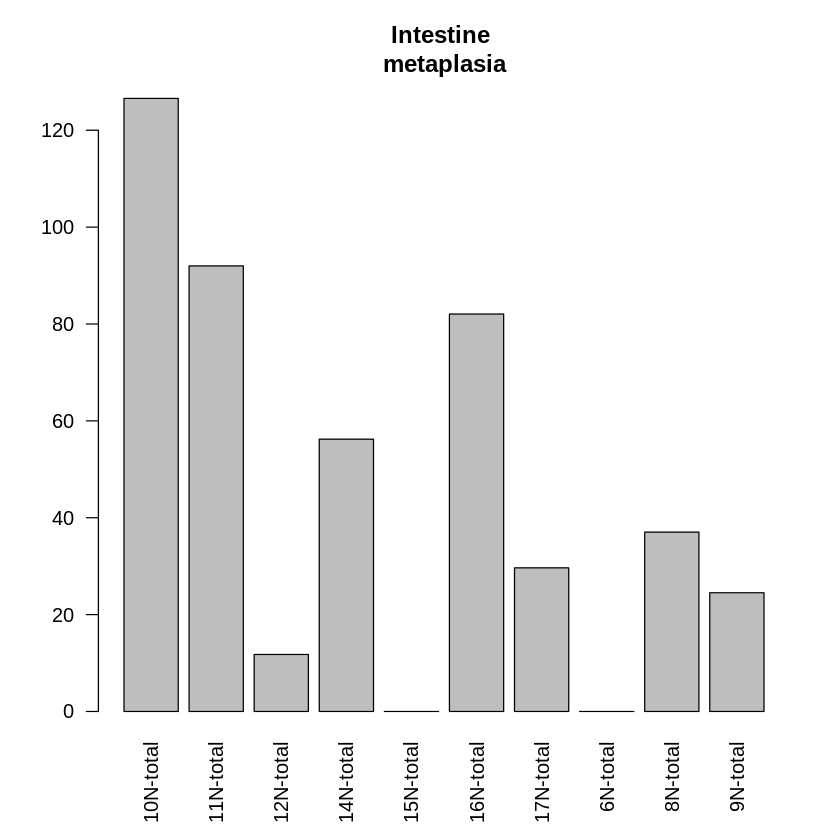

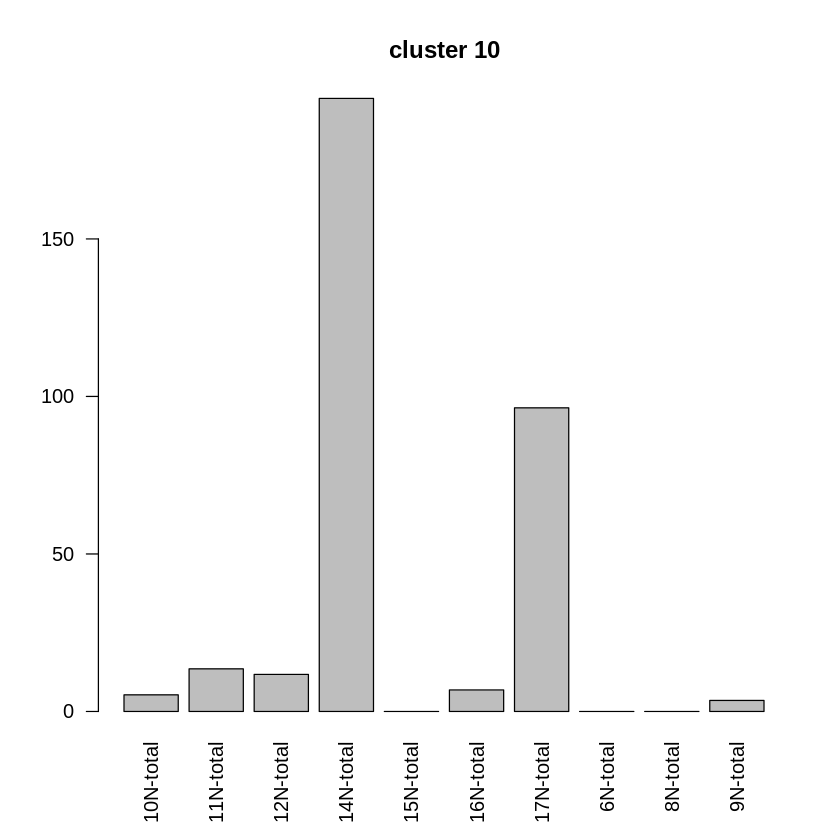

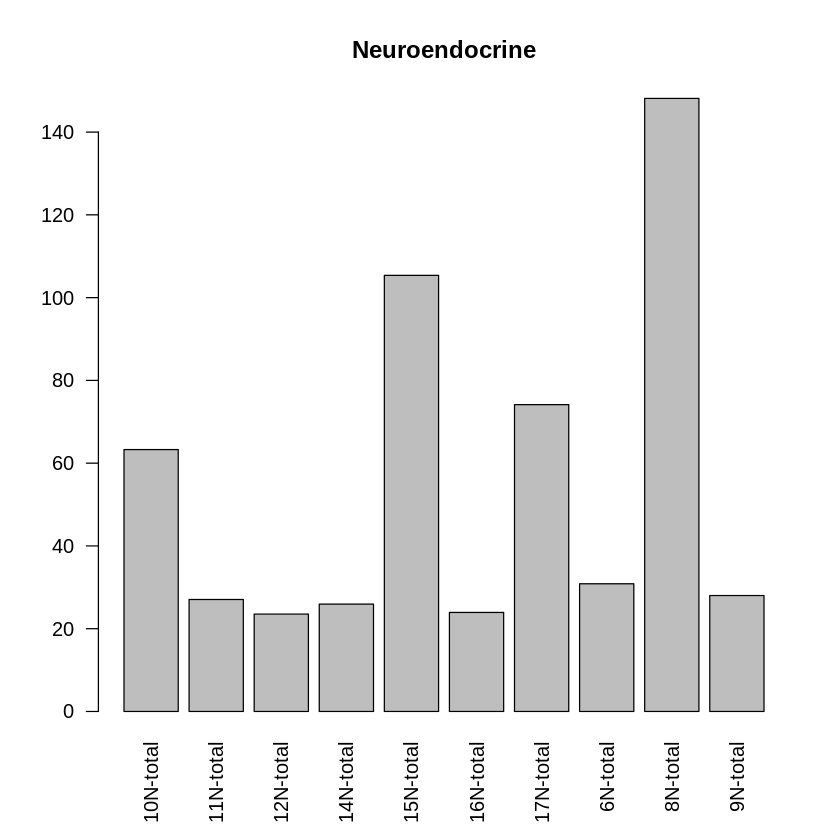

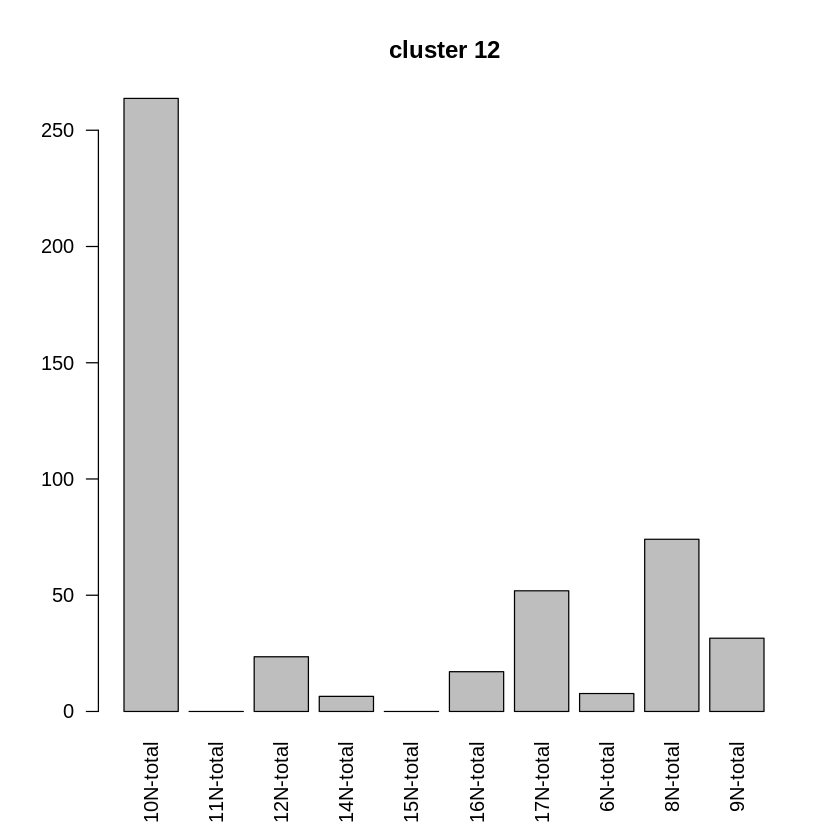

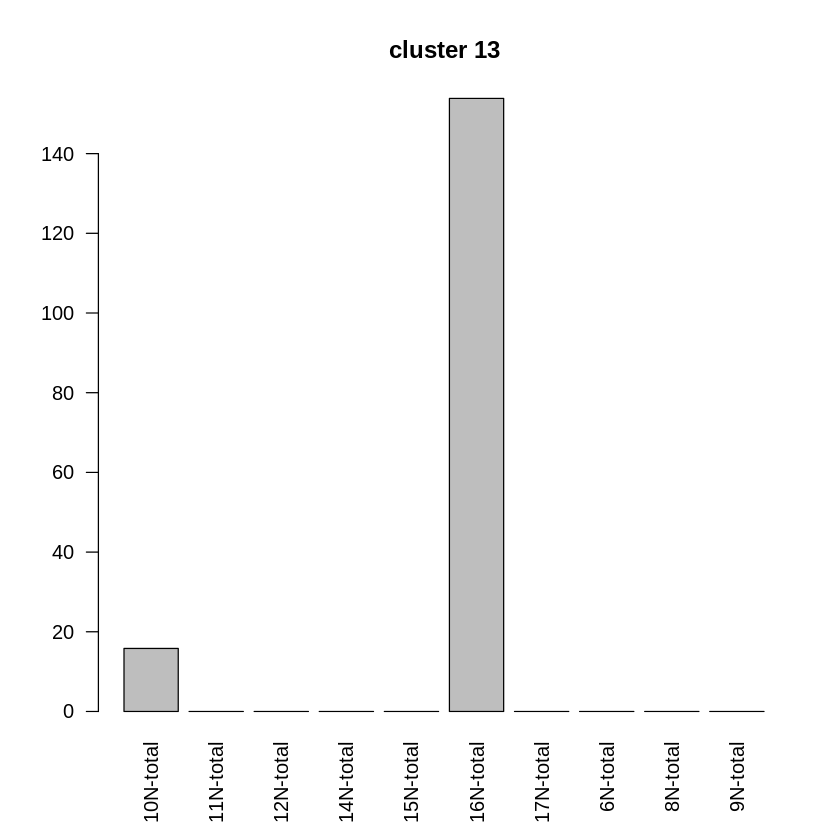

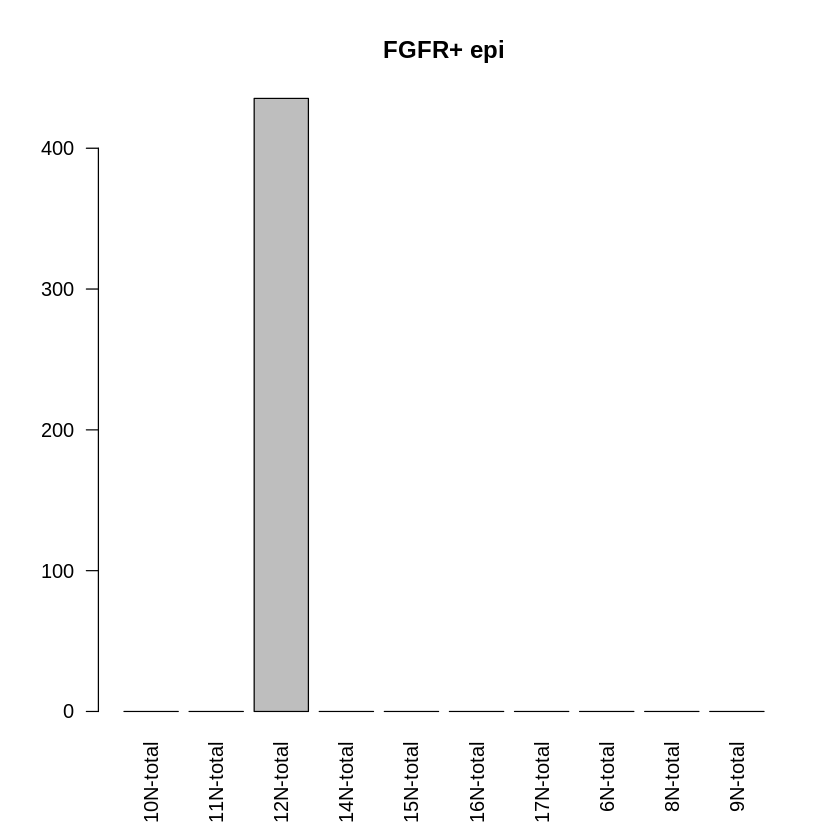

In [84]:
for (i in 1:dim(cluster_count)[1]){
    barplot(cluster_count[i,]/table(epithelials2[[]]$orig.ident)*table(all[[]]$orig.ident),las=2, main=rownames(cluster_count)[i])
}